The goal of this Notebook will be evaluate the performance of each ANN1, ANN2, and each version of ANN3 and ANN4

In [2]:
#First run the functions workbook 
%run Functions.ipynb

First, load in the experimental data, the parameters determined from the traditional least-square regression process on the completeEASE software, and the optical properties of the substrates and void.

In [4]:
# Define path where optical properties are
os.chdir(r"XXXX") ########## PLEASE PUT THE DIRECTORY TO THE FOLDER LABELED "Optical Properties" in the XXXX space ####################
# File name for soda lime glass substrate
file =  "SLG.csv"
# Read in SLG optical properties
SLG = pd.read_csv(file)
SLG.name = 'SLG'

# File name for void
file =  "Void.csv"
# Read in void optical properties
Void = pd.read_csv(file)
Void.name = "Void"

# Define the photon energy range as variable E for future use. 
E = SLG['Energy (eV)']
# Define the same range in wavelength for future use
wv = SLG['Wavelength (nm)']

# File name for Si wafer from CompleteEASE database 
file =  "Si_JAW.csv"
# load in Si wafer
Si_JAW = pd.read_csv(file)
Si_JAW.name = "Si_JAW"

# File name for native oxide from CompleteEASE database 
file =  "NTVE_JAW.csv"
NTVE_JAW = pd.read_csv(file)
NTVE_JAW.name = "NTVE_JAW"


In [6]:
# Now load in the experimental data and the associated LSR parameters for evaluation and comparisons

# Location of files
os.chdir(r"XXXX") ########## PLEASE PUT THE DIRECTORY TO THE FOLDER LABELED "Traditional_LSR" in the XXXX space ####################

############ MV1519 Sample Load in ############################

file = "MV1519-Data.csv" # File name for experimental data for sample MV1519
MV1519 = pd.read_csv(file) # read file as pandas dataframe
MV1519.name = 'MV1519' # name dataframe  
MV1519 =  MV1519.drop(MV1519.columns[0], axis=1) # Reformat data by removing the first column


SE_data = [] # list that will eventually contain the experimental data. Each entry in the list will be a pandas dataframe with SE data in  (E,N,C,S)

for i in range(81): # iterate for the 81 point map.
    
    temp = MV1519.iloc[:, (i*3):(3 *(i+1))] # read a single set of (N,C,S)
    temp.insert(0, 'Energy (eV)', E) # add Photon Enery E in eV
    SE_data.append(temp) #add data to list
    
MV1519 = np.array(SE_data) # reformat data to an np array.


# Load in the parameters from the LSR analysis done on CompleteEASE.
file = "MV1519-CL-Params.csv" # file with parameters from LSR
MV1519_params = pd.read_csv(file) # read in files and pandas dataframe

############ MV1523 Sample Load in ############################

file = "MV1523-Data.csv" # File name for experimental data for sample MV1523
MV1523 = pd.read_csv(file) # read file as pandas dataframe
MV1523.name = 'MV1523' # name file 
MV1523 =  MV1523.drop(MV1523.columns[0], axis=1) # Reformat data by removing the first column


SE_data = [] # list that will eventually contain the experimental data. Each entry in the list will be a pandas dataframe with SE data in  (E,N,C,S)

for i in range(81): # iterate for the 81 point map.
    
    temp = MV1523.iloc[:, (i*3):(3 *(i+1))] # read a single set of (N,C,S)
    temp.insert(0, 'Energy (eV)', E) # add Photon Enery E in eV
    SE_data.append(temp) #add data to list
    
MV1523 = np.array(SE_data) # reformat data to an np array.

# Load in the parameters from the LSR analysis done on CompleteEASE.
file = "MV1523-CL-Params.csv" # file with parameters from least-square analysis
MV1523_params = pd.read_csv(file) # read in files and pandas dataframe


############ MV1530 Sample Load in ############################

file = "MV1530-Data.csv" # File name for experimental data for sample MV1530
MV1530 = pd.read_csv(file) # read file as pandas dataframe
MV1530.name = 'MV1530' # name file 
MV1530 =  MV1530.drop(MV1530.columns[0], axis=1) # Reformat data by removing the first column


SE_data = [] # list that will eventually contain the experimental data. Each entry in the list will be a pandas dataframe with SE data in  (E,N,C,S)

for i in range(81): # iterate for the 81 point map.
    
    temp = MV1530.iloc[:, (i*3):(3 *(i+1))] # read a single set of (N,C,S)
    temp.insert(0, 'Energy (eV)', E)  # add Photon Enery E in eV
    SE_data.append(temp) #add data to list

    
MV1530 = np.array(SE_data) # reformat data to an np array.


# Now we want to load in the parameters from the least-square regression analysis done on CompleteEASE.
file = "MV1530-CL-Params.csv" # file with parameters from least-square analysis
MV1530_params = pd.read_csv(file) # read in files and pandas dataframe


Now load in each ANN for evaluation. Starting with ANN1 and ANN2.

In [9]:
#Load In Model

# move to location of the pre-trained models
os.chdir(r"XXXX") ########## PLEASE PUT THE DIRECTORY TO THE FOLDER LABELED "Models" in the XXXX space ####################

# Load in models that make boolean predictions on structure
ANN1 = load_model('ANN1.keras')
ANN2 = load_model('ANN2.keras')


ANN1 and ANN2 are trained with simulated spectroscopic ellipsometry data from Data_Set_3. The associated test set will be loaded in to evaluate the performance of ANN1 and ANN2. The test set contains simulated data generated in the same way, but this data is not used during taining.



In [ ]:
# Load in test data from Data_Set_3.

# Identify the location of the data 
path = r'XXXX'  ########## PLEASE PUT THE DIRECTORY OF THE TEST DATA OF DATA SET 3 in the XXXX space ####################

# Get the data using function "get_data_CL"
test_files, test_data, test_Ep, test_Eg, test_Eo, test_Br, test_Amp, test_Einf, test_BulkT, test_EMA_bool, test_EMAT, test_Sub_bool =  get_data_CL(path)

# Randomly Shuffle the data using function "unison_shuffled_copies"
test_files, test_data, test_Ep, test_Eg, test_Eo, test_Br, test_Amp, test_Einf, test_BulkT, test_EMA_bool, test_EMAT, test_Sub_bool  = unison_shuffled_copies( test_files, test_data, test_Ep, test_Eg, test_Eo, test_Br, test_Amp, test_Einf, test_BulkT, test_EMA_bool, test_EMAT, test_Sub_bool )

In [14]:
# Evaluate the performance of ANN1 on the test data. ANN1 is trained to predict the variable "test_Sub_bool".
# This variable is binary with "0" Si wafer substrate and "1" meaning SLG substrate

# Generate predictions from ANN1
ANN1_Predictions = ANN1.predict (test_data)

# Since the decision is binary, predictions < 0.5 will be rounded to 0 and predictions >= 0.5 will be rounded up to 1. 
num_correct = 0
num_wrong = 0

for i in range(len(test_data)): # iterate over training set

    if ANN1_Predictions[i][0] >= 0.5 and test_Sub_bool[i] >= 0.5: # If both prediction and ground truth are 1
        num_correct = num_correct + 1 # add one to correct count

    elif ANN1_Predictions[i][0] < 0.5 and test_Sub_bool[i] < 0.5: # If both prediction and ground truth are 0
        num_correct = num_correct + 1 # add one to correct count 

    else: # if prediction and ground truth do not match 
        num_wrong = num_wrong + 1 # add to wrong count

print( 'Fraction Correct: ' + str( num_correct / ( num_correct + num_wrong) ) ) # print fraction of correct predictions
print( 'Fraction Wrong: ' + str( num_wrong / ( num_correct + num_wrong) ) )  # print fraction of wrong predictions
    
    

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Fraction Correct: 1.0
Fraction Wrong: 0.0


ANN1 was able to predict every substrate in the test set correctly! 

In [30]:
# Evaluate the performance of ANN2 on the test data. ANN2 is trained to predict the variable "test_EMA_bool".
# This variable is binary with "0" meaning no surface layer was used to simulate the data and "1" meaning a surface layer was used to simulate the data

# Generate predictions from ANN2
ANN2_Predictions = ANN2.predict(test_data)

# Since the decision is binary, predictions < 0.5 will be rounded to 0 and predictions >= 0.5 will be rounded up to 1. 
num_correct = 0
num_wrong = 0
num_wrong_index =[]
false_positive_SL_index = []
false_negative_SL_index = []

for i in range(len(test_data)): # iterate over training set

    if ANN2_Predictions[i][0] >= 0.5 and test_EMA_bool[i] >= 0.5: # If both prediction and ground truth are 1
        num_correct = num_correct + 1 # add one to correct count

    elif ANN2_Predictions[i][0] < 0.5 and test_EMA_bool[i] < 0.5: # If both prediction and ground truth are 0
        num_correct = num_correct + 1 # add one to correct count 

    elif ANN2_Predictions[i][0] > 0.5 and test_EMA_bool[i] < 0.5: # Flase positive
        num_wrong = num_wrong + 1 # add to wrong count
        num_wrong_index.append(i) # stores the index of any wrong predictions
        false_positive_SL_index.append(i)

    elif ANN2_Predictions[i][0] < 0.5 and test_EMA_bool[i] > 0.5: # Flase negative
        num_wrong = num_wrong + 1 # add to wrong count
        num_wrong_index.append(i) # stores the index of any wrong predictions
        false_negative_SL_index.append(i)


print( 'Fraction Correct: ' + str( num_correct / ( num_correct + num_wrong) ) )
print( 'Fraction Wrong: ' + str( num_wrong / ( num_correct + num_wrong) ) ) 
print( 'Number Correct: ' + str( num_correct )  )
print( 'Number Wrong: ' + str( num_wrong )  )
print( 'Number of False Positive: ' + str( len(false_positive_SL_index)  ))
print( 'Number of False Negative: ' + str( len(false_negative_SL_index)  ))    

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step
Fraction Correct: 0.8978
Fraction Wrong: 0.1022
Number Correct: 4489
Number Wrong: 511
Number of False Positive: 248
Number of False Negative: 263


ANN2 was correct nearly 90% of the time. The 511 failed trials will be examined more closely.

In [ ]:
Si_sub = 0  # number of failed trials with Si substrate 
SL = 0 # number of failed trials with a surface layer
SL_small = 0 # number of failed trials where the surface layer thickness is < 0.5 nm


for i in range(len(num_wrong_index)): # iterate for every failed trial

    if test_Sub_bool[num_wrong_index[i]] < 0.5: # if substrate is Si wafer
        Si_sub = Si_sub + 1 # add 1 to Si_sub

    if test_EMA_bool[num_wrong_index[i]] > 0.5: # if there is a surface layer
        SL = SL + 1 # add 1 to SL 

        if test_EMAT[num_wrong_index[i]] <= 0.5: # if surface layer thickness is less than 0.5 nm 
            SL_small = SL_small + 1 # add 1 to SL_small

    if test_BulkT[num_wrong_index[i]] <= 75: 
        bulk_small = bulk_small + 1


print('Number of failures with c-Si Substrate: ' + str( Si_sub ) )
print('Number of failures with Surface Layer: ' + str( SL ) )
print('Number of failures with Surface Layer less than 0.5 nm: ' + str( SL_small ) )

In [ ]:
# Examine the trials that failed. Starting with the substrate

data = test_Sub_bool[num_wrong_index] # det subset of data from failed trials 

# Define the range and number of bins for histogram
min_value = 0
max_value = 1
num_bins = 2


# Create bins using np.linspace to generate equally spaced bins
bins = np.linspace(min_value, max_value, num_bins + 1)

# Count the number of data points in each bin
hist, edges = np.histogram(data, bins)

# Print the counts for each bin
for count, edge in zip(hist, edges[:-1]):
    print(f'Bin {edge:.2f} to {edges[edges.tolist().index(edge) + 1]:.2f}: {count}')

labels = ['c-Si Substrate', 'SLG Substrate']

# Optional: Plot the histogram
plt.hist(data, bins, edgecolor='black')
plt.xticks(edges)
plt.xticks([0.25, 0.75], labels=labels )
plt.tick_params(axis='both', direction='in', length=2)
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Examine the trials that failed. Starting with the substrate

data = test_EMA_bool[num_wrong_index] # det subset of data from failed trials 

# Define the range and number of bins for histogram
min_value = 0
max_value = 1
num_bins = 2


# Create bins using np.linspace to generate equally spaced bins
bins = np.linspace(min_value, max_value, num_bins + 1)

# Count the number of data points in each bin
hist, edges = np.histogram(data, bins)

# Print the counts for each bin
for count, edge in zip(hist, edges[:-1]):
    print(f'Bin {edge:.2f} to {edges[edges.tolist().index(edge) + 1]:.2f}: {count}')

labels = ['No Surface Layer', 'Surface Layer']

# Optional: Plot the histogram
plt.hist(data, bins, edgecolor='black')
plt.xticks([0.25, 0.75], labels=labels )
plt.tick_params(axis='both', direction='in', length=2)
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Examine the trials that failed. Starting with the substrate

data = test_EMAT[num_wrong_index] # det subset of data from failed trials 

# Define the range and number of bins for histogram
min_value = 0.1
max_value = 2
num_bins = 10


# Create bins using np.linspace to generate equally spaced bins
bins = np.linspace(min_value, max_value, num_bins + 1)

# Count the number of data points in each bin
hist, edges = np.histogram(data, bins)

# Print the counts for each bin
for count, edge in zip(hist, edges[:-1]):
    print(f'Bin {edge:.2f} to {edges[edges.tolist().index(edge) + 1]:.2f}: {count}')


# Optional: Plot the histogram
plt.hist(data, bins, edgecolor='black')
plt.xticks(edges)
plt.tick_params(axis='both', direction='in', length=2)
plt.xlabel('Surface Layer Thickness (nm)')
plt.ylabel('Frequency')

plt.show()

In [ ]:
# Examine the trials that failed. Starting with the substrate

data = test_BulkT[false_negative_SL_index] # det subset of data from failed trials 

# Define the range and number of bins for histogram
min_value = 25
max_value = 125
num_bins = 10


# Create bins using np.linspace to generate equally spaced bins
bins = np.linspace(min_value, max_value, num_bins + 1)

# Count the number of data points in each bin
hist, edges = np.histogram(data, bins)

# Print the counts for each bin
for count, edge in zip(hist, edges[:-1]):
    print(f'Bin {edge:.2f} to {edges[edges.tolist().index(edge) + 1]:.2f}: {count}')


# Optional: Plot the histogram
plt.hist(data, bins, edgecolor='black')
plt.xticks(edges)
plt.tick_params(axis='both', direction='in', length=6)
plt.xlabel('Bulk Thickness (nm)')
plt.ylabel('Frequency')
plt.show()

It appears that most of the failed trails occur when ANN2 is making a prediction on the c-Si substrate. There appears to be an issue making distinctions between relatively thin ( < 0.5 nm) surface layers and no surface layer. There is likely little to no change in the ellipsometric spctra from the presence of this thin surface layer on the c-Si substrate samples, so it is not alarming that these error occur. The failures become much less frequent when the surface layer has a thickness higher than 0.5 nm suggesting that this approach will perform more reliably on materials with thicker surface layers. Despite these failed trials. ANN2 still perfromed with almost 90% accuracy. 





According to the traditional Least-square regression analysis, samples MV1519 and MV1523 are not sensitive to a surface layer in the analysis, but the MV1530 sample is sensitive to a surface layer. Also, samples MV1519 and MV1523 are fabricated on Si wafer while sample MV1530 is fabricated on SLG.

In [47]:
# Evaluate the performance of the ANN1 on the experimental data. .
# This variable is binary with "0" meaning Si wafer  needed "1" meaning SLG for the substrate
# MV1519 and MV1523 both have Si wafer substrate, but MV1530 has an SLG substrate

# Generate predictions from ANN1 on experimental data 
ANN1_Predictions_MV1519 = ANN1.predict(MV1519)
ANN1_Predictions_MV1523 = ANN1.predict(MV1523)
ANN1_Predictions_MV1530 = ANN1.predict(MV1530)

# score values for MV1519
num_correct_MV1519 = 0
num_wrong_MV1519 = 0

# score values for MV1523
num_correct_MV1523 = 0
num_wrong_MV1523 = 0

# score values for MV1530
num_correct_MV1530 = 0
num_wrong_MV1530 = 0

for i in range(81): # iterate over each 81 point map

    # Check values for MV1519 
    if ANN1_Predictions_MV1519[i][0] < 0.5: # we know MV1519 value should always be '0' according the LSR
        num_correct_MV1519 = num_correct_MV1519 + 1

    else: num_wrong_MV1519 = num_wrong_MV1519 + 1

    # Check values for MV1523
    if ANN1_Predictions_MV1523[i][0] < 0.5: # we know MV1523 value should always be '0' according the LSR
        num_correct_MV1523 = num_correct_MV1523 + 1

    else: num_wrong_MV1523 = num_wrong_MV1523 + 1

    # Check values for MV1530
    if ANN1_Predictions_MV1530[i][0] >= 0.5: # we know MV1530 value should always be '1' according the LSR
        num_correct_MV1530 = num_correct_MV1530 + 1

    else: num_wrong_MV1530 = num_wrong_MV1530 + 1



print( 'Fraction Correct MV1519: ' + str( num_correct_MV1519 / ( num_correct_MV1519 + num_wrong_MV1519 ) ) )
print( 'Fraction Wrong MV1519: ' + str( num_wrong_MV1519  / ( num_correct_MV1519  + num_wrong_MV1519 ) ) ) 
print( 'Fraction Correct MV1523: ' + str( num_correct_MV1523 / ( num_correct_MV1523 + num_wrong_MV1523 ) ) )
print( 'Fraction Wrong MV1523: ' + str( num_wrong_MV1523  / ( num_correct_MV1523  + num_wrong_MV1523 ) ) ) 
print( 'Fraction Correct MV1530: ' + str( num_correct_MV1530 / ( num_correct_MV1530 + num_wrong_MV1530 ) ) )
print( 'Fraction Wrong MV1530: ' + str( num_wrong_MV1530  / ( num_correct_MV1530  + num_wrong_MV1530 ) ) ) 
    
    

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Fraction Correct MV1519: 1.0
Fraction Wrong MV1519: 0.0
Fraction Correct MV1523: 1.0
Fraction Wrong MV1523: 0.0
Fraction Correct MV1530: 1.0
Fraction Wrong MV1530: 0.0


In [49]:
# Evaluate the performance of the ANN2 on the experimental data. .
# This variable is binary with "0" meaning no surface layer is needed "1" meaning a surface layer is needed
# MV1519 and MV1523 both do not have surface layers in traditional analysis, but MV1530 needs a surface layer

# Generate predictions from Surface_Layer_ANN on experimental data 
ANN2_Predictions_MV1519 = ANN2.predict(MV1519)
ANN2_Predictions_MV1523 = ANN2.predict(MV1523)
ANN2_Predictions_MV1530 = ANN2.predict(MV1530)

# score values for MV1519
num_correct_MV1519 = 0
num_wrong_MV1519 = 0

# score values for MV1523
num_correct_MV1523 = 0
num_wrong_MV1523 = 0

# score values for MV1530
num_correct_MV1530 = 0
num_wrong_MV1530 = 0

for i in range(81): # iterate over each 81 point map

    # Check values for MV1519 
    if ANN2_Predictions_MV1519[i][0] < 0.5: # we know MV1519 value should always be '0' according the LSR
        num_correct_MV1519 = num_correct_MV1519 + 1

    else: num_wrong_MV1519 = num_wrong_MV1519 + 1

    # Check values for MV1523
    if ANN2_Predictions_MV1523[i][0] < 0.5: # we know MV1523 value should always be '0' according the LSR
        num_correct_MV1523 = num_correct_MV1523 + 1

    else: num_wrong_MV1523 = num_wrong_MV1523 + 1

    # Check values for MV1530
    if ANN2_Predictions_MV1530[i][0] >= 0.5: # we know MV1530 value should always be '1' according the LSR
        num_correct_MV1530 = num_correct_MV1530 + 1

    else: num_wrong_MV1530 = num_wrong_MV1530 + 1



print( 'Fraction Correct MV1519: ' + str( num_correct_MV1519 / ( num_correct_MV1519 + num_wrong_MV1519 ) ) )
print( 'Fraction Wrong MV1519: ' + str( num_wrong_MV1519  / ( num_correct_MV1519  + num_wrong_MV1519 ) ) ) 
print( 'Fraction Correct MV1523: ' + str( num_correct_MV1523 / ( num_correct_MV1523 + num_wrong_MV1523 ) ) )
print( 'Fraction Wrong MV1523: ' + str( num_wrong_MV1523  / ( num_correct_MV1523  + num_wrong_MV1523 ) ) ) 
print( 'Fraction Correct MV1530: ' + str( num_correct_MV1530 / ( num_correct_MV1530 + num_wrong_MV1530 ) ) )
print( 'Fraction Wrong MV1530: ' + str( num_wrong_MV1530  / ( num_correct_MV1530  + num_wrong_MV1530 ) ) ) 
    
    

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Fraction Correct MV1519: 1.0
Fraction Wrong MV1519: 0.0
Fraction Correct MV1523: 1.0
Fraction Wrong MV1523: 0.0
Fraction Correct MV1530: 1.0
Fraction Wrong MV1530: 0.0


ANN1 and ANN2 are in complete agreement with the traditional least-square regression analysis! Now evaluate the performance of the ANN3 and ANN4  

In [56]:
# load in mean and standard deviation for each size training set

# change directory to location of files 
os.chdir(r'XXXX')  ########## PLEASE PUT THE DIRECTORY WHERE YOU STORED THE MEAN AND STANDARD DEVIATIONS FOR EACH DATA SET ####################
############ THE MEAN AND STANDARD DEVIATIONS SHOULD HAVE BEEN MADE IN THE "Model_Development" WORKBOOK ########################

file = 'Data_Set1_10_Mean.csv' # mean for data set of size 10
Data_Set1_10_Mean = pd.read_csv(file) # read in files and pandas dataframe

file = 'Data_Set1_10_std.csv'  # mean standard deviation for data set of size 10
Data_Set1_10_std = pd.read_csv(file) # read in files and pandas dataframe

file = 'Data_Set1_100_Mean.csv' # mean for data set of size 100
Data_Set1_100_Mean = pd.read_csv(file) # read in files and pandas dataframe

file = 'Data_Set1_100_std.csv'  # mean standard deviation for data set of size 100
Data_Set1_100_std = pd.read_csv(file) # read in files and pandas dataframe

file = 'Data_Set1_1000_Mean.csv' # mean for data set of size 1000
Data_Set1_1000_Mean = pd.read_csv(file) # read in files and pandas dataframe

file = 'Data_Set1_1000_std.csv'  # mean standard deviation for data set of size 1000
Data_Set1_1000_std = pd.read_csv(file) # read in files and pandas dataframe

file = 'Data_Set1_10000_Mean.csv' # mean for data set of size 10000
Data_Set1_10000_Mean = pd.read_csv(file) # read in files and pandas dataframe

file = 'Data_Set1_10000_std.csv'  # mean standard deviation for data set of size 10000
Data_Set1_10000_std = pd.read_csv(file) # read in files and pandas dataframe

file = 'Data_Set1_50000_Mean.csv' # mean for data set of size 50000
Data_Set1_50000_Mean = pd.read_csv(file) # read in files and pandas dataframe

file = 'Data_Set1_50000_std.csv'  # mean standard deviation for data set of size 50000
Data_Set1_50000_std = pd.read_csv(file) # read in files and pandas dataframe

file = 'Data_Set1_100000_Mean.csv' # mean for data set of size 50000
Data_Set1_100000_Mean = pd.read_csv(file) # read in files and pandas dataframe

file = 'Data_Set1_100000_std.csv'  # mean standard deviation for data set of size 50000
Data_Set1_100000_std = pd.read_csv(file) # read in files and pandas dataframe


In [58]:
# Load in all the ANNs 

# move to location of the pre-trained models
os.chdir(r"XXXX") ########## PLEASE PUT THE DIRECTORY TO THE FOLDER LABELED "Models" in the XXXX space ####################

# Load in models for the different versions of ANN3
ANN3_10 = load_model('ANN3_10.keras')
ANN3_100 = load_model('ANN3_100.keras')
ANN3_1000 = load_model('ANN3_1000.keras')
ANN3_10000 = load_model('ANN3_10000.keras')
ANN3_50000 = load_model('ANN3_50000.keras')
ANN3_100000 = load_model('ANN3_100000.keras')



In [60]:
# Load in the 10000 test data set.

# Identify the location of the data 
path = r'XXXX'  ########## PLEASE PUT THE DIRECTORY OF THE TEST DATA OF DATA SET 1 in the XXXX space ####################

# Get the data using function "get_data_CL"
test_files, test_data, test_Ep, test_Eg, test_Eo, test_Br, test_Amp, test_Einf, test_BulkT, test_EMA_bool, test_EMAT, test_Sub_bool =  get_data_CL(path)

# Randomly Shuffle the data using function "unison_shuffled_copies"
test_files, test_data, test_Ep, test_Eg, test_Eo, test_Br, test_Amp, test_Einf, test_BulkT, test_EMA_bool, test_EMAT, test_Sub_bool  = unison_shuffled_copies( test_files, test_data, test_Ep, test_Eg, test_Eo, test_Br, test_Amp, test_Einf, test_BulkT, test_EMA_bool, test_EMAT, test_Sub_bool )


# Save test parameters for later analysis
y_test_DS1 = {

    'Ep' :  test_Ep,
    'Eg' :  test_Eg,
    'Eo' :  test_Eo,
    'Br' :  test_Br,
    'Amp' : test_Amp,
    'BulkT': test_BulkT,

}

In [61]:
# Generate predictions on the test data 

ANN3_10_test = ANN3_10.predict(test_data)
ANN3_100_test = ANN3_100.predict(test_data)
ANN3_1000_test = ANN3_1000.predict(test_data)
ANN3_10000_test = ANN3_10000.predict(test_data)
ANN3_50000_test = ANN3_50000.predict(test_data)
ANN3_100000_test = ANN3_100000.predict(test_data)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


A function is defined to unstandardize the data.

In [63]:
#Define a function to help un-standardize the data once it is generated by the ANN
def UnStandardize_ANN_Output(Standard_Means, Standard_Std, Model_Predictions): 
    """
    Standard_Means: A pandas dataframe containing all the mean values
    Standard_Std: A pandas dataframe containing all the standard deviation values
    Model_Predictions: The output of an ANN model we want to unstandardize
    """
    
    Model_Predicted_Ep = (Model_Predictions[:,0] * Standard_Std['std_Ep'][0]) + Standard_Means['Mean_Ep'][0]
    Model_Predicted_Eg = (Model_Predictions[:,1] * Standard_Std['std_Eg'][0]) + Standard_Means['Mean_Eg'][0]
    Model_Predicted_Eo = (Model_Predictions[:,2] * Standard_Std['std_Eo'][0]) + Standard_Means['Mean_Eo'][0]
    Model_Predicted_Br = (Model_Predictions[:,3] * Standard_Std['std_Br'][0]) + Standard_Means['Mean_Br'][0]
    Model_Predicted_Amp = (Model_Predictions[:,4] * Standard_Std['std_Amp'][0]) + Standard_Means['Mean_Amp'][0]
    Model_Predicted_BulkT = (Model_Predictions[:,5] * Standard_Std['std_BulkT'][0]) + Standard_Means['Mean_BulkT'][0]

    
    if len( Model_Predictions[0]) == 7: # If there is an EMA layer included
        
        Model_Predicted_EMAT = (Model_Predictions[:,6] * Standard_Std['std_EMAT'][0]) + Standard_Means['Mean_EMAT'][0]
        
        dict1 = {
        'Ep' : Model_Predicted_Ep,
        'Eg' :  Model_Predicted_Eg, 
        'Eo' :  Model_Predicted_Eo,
        'Br' :  Model_Predicted_Br, 
        'Amp':  Model_Predicted_Amp,
        'BulkT': Model_Predicted_BulkT,
        'EMAT': Model_Predicted_EMAT 
        }
    
        return(dict1)

    if len(Model_Predictions[0]) == 6: # If there is NO EMA layer included
        
        dict1 = {
        'Ep' :  Model_Predicted_Ep,
        'Eg' :  Model_Predicted_Eg, 
        'Eo' :  Model_Predicted_Eo,
        'Br' :  Model_Predicted_Br, 
        'Amp':  Model_Predicted_Amp,
        'BulkT': Model_Predicted_BulkT 
        }
        return(dict1)
        


In [64]:
# Unstandardize the data 

ANN3_10_test = UnStandardize_ANN_Output( Data_Set1_10_Mean, Data_Set1_10_std, ANN3_10_test)
ANN3_100_test = UnStandardize_ANN_Output( Data_Set1_100_Mean, Data_Set1_100_std, ANN3_100_test)
ANN3_1000_test = UnStandardize_ANN_Output( Data_Set1_1000_Mean, Data_Set1_1000_std, ANN3_1000_test)
ANN3_10000_test = UnStandardize_ANN_Output( Data_Set1_10000_Mean, Data_Set1_10000_std, ANN3_10000_test)
ANN3_50000_test = UnStandardize_ANN_Output( Data_Set1_50000_Mean, Data_Set1_50000_std, ANN3_50000_test)
ANN3_100000_test = UnStandardize_ANN_Output( Data_Set1_100000_Mean, Data_Set1_100000_std, ANN3_100000_test)



In [65]:
# Now generate predictions on the experimental data 

ANN3_10_MV1519 = ANN3_10.predict(MV1519)
ANN3_10_MV1523 = ANN3_10.predict(MV1523)

ANN3_100_MV1519 = ANN3_100.predict(MV1519)
ANN3_100_MV1523 = ANN3_100.predict(MV1523)

ANN3_1000_MV1519 = ANN3_1000.predict(MV1519)
ANN3_1000_MV1523 = ANN3_1000.predict(MV1523)

ANN3_10000_MV1519 = ANN3_10000.predict(MV1519)
ANN3_10000_MV1523 = ANN3_10000.predict(MV1523)

ANN3_50000_MV1519 = ANN3_50000.predict(MV1519)
ANN3_50000_MV1523 = ANN3_50000.predict(MV1523)

ANN3_100000_MV1519 = ANN3_100000.predict(MV1519)
ANN3_100000_MV1523 = ANN3_100000.predict(MV1523)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [66]:
# Now unstandardize the predictions

ANN3_10_MV1519 = UnStandardize_ANN_Output( Data_Set1_10_Mean, Data_Set1_10_std, ANN3_10_MV1519)
ANN3_10_MV1523 = UnStandardize_ANN_Output( Data_Set1_10_Mean, Data_Set1_10_std, ANN3_10_MV1523)

ANN3_100_MV1519 = UnStandardize_ANN_Output( Data_Set1_100_Mean, Data_Set1_100_std, ANN3_100_MV1519)
ANN3_100_MV1523 = UnStandardize_ANN_Output( Data_Set1_100_Mean, Data_Set1_100_std, ANN3_100_MV1523)

ANN3_1000_MV1519 = UnStandardize_ANN_Output( Data_Set1_1000_Mean, Data_Set1_1000_std, ANN3_1000_MV1519)
ANN3_1000_MV1523 = UnStandardize_ANN_Output( Data_Set1_1000_Mean, Data_Set1_1000_std, ANN3_1000_MV1523)

ANN3_10000_MV1519 = UnStandardize_ANN_Output( Data_Set1_10000_Mean, Data_Set1_10000_std, ANN3_10000_MV1519)
ANN3_10000_MV1523 = UnStandardize_ANN_Output( Data_Set1_10000_Mean, Data_Set1_10000_std, ANN3_10000_MV1523)

ANN3_50000_MV1519 = UnStandardize_ANN_Output( Data_Set1_50000_Mean, Data_Set1_50000_std, ANN3_50000_MV1519)
ANN3_50000_MV1523 = UnStandardize_ANN_Output( Data_Set1_50000_Mean, Data_Set1_50000_std, ANN3_50000_MV1523)

ANN3_100000_MV1519 = UnStandardize_ANN_Output( Data_Set1_100000_Mean, Data_Set1_100000_std, ANN3_100000_MV1519)
ANN3_100000_MV1523 = UnStandardize_ANN_Output( Data_Set1_100000_Mean, Data_Set1_100000_std, ANN3_100000_MV1523)


# Now store the predictions
path = r'XXXX'  ########## PLEASE PUT THE DIRECTORY FOR WHERE YOU WOULD LIKE THE ANN PREDICTIONS TO BE STORED ####################

df = pd.DataFrame(ANN3_10_MV1519)
df.to_csv('ANN3_10_MV1519.csv')

df = pd.DataFrame(ANN3_100_MV1519)
df.to_csv('ANN3_100_MV1519.csv')

df = pd.DataFrame(ANN3_1000_MV1519)
df.to_csv('ANN3_1000_MV1519.csv')

df = pd.DataFrame(ANN3_10000_MV1519)
df.to_csv('ANN3_10000_MV1519.csv')

df = pd.DataFrame(ANN3_50000_MV1519)
df.to_csv('ANN3_50000_MV1519.csv')

df = pd.DataFrame(ANN3_100000_MV1519)
df.to_csv('ANN3_100000_MV1519.csv')

df = pd.DataFrame(ANN3_10_MV1523)
df.to_csv('ANN3_10_MV1523.csv')

df = pd.DataFrame(ANN3_100_MV1523)
df.to_csv('ANN3_100_MV1523.csv')

df = pd.DataFrame(ANN3_1000_MV1523)
df.to_csv('ANN3_1000_MV1523.csv')

df = pd.DataFrame(ANN3_10000_MV1523)
df.to_csv('ANN3_10000_MV1523.csv')

df = pd.DataFrame(ANN3_50000_MV1523)
df.to_csv('ANN3_50000_MV1523.csv')

df = pd.DataFrame(ANN3_100000_MV1523)
df.to_csv('ANN3_100000_MV1523.csv')


Now the predictions ANN3 are ready. Ellipsometric spectra will be generated for each prediction and compared to the experimental data by calculating the unweighted error function between ANN and experiment. The traditional least-square regression (LSR) unweighted error function will also be calculated. 

In [68]:
# Now generate the NCS spectra for the traditionaLSR analysis 

############## MV1519 LSR ###########################################
LSR_MV1519_NCS =[]
LSR_MV1519_CL_List =[]
for i in range(len(MV1519_params['Amp'])):
    
    #first get Cody-Lorentz oscillator parameters
    E_inf = 1 # range fixed to 1
    Ep  = float(MV1519_params['Ep'][i])
    Amp  = float(MV1519_params['Amp'][i])
    Br =   float(MV1519_params['Br'][i])
    Eo =   float(MV1519_params['Eo'][i])
    Eg =   float(MV1519_params['Eg'][i])
    Et = 0 #this term being 0 effectivly neglects the Urbach energy and simplifies the equations.
    Egt = Eg + Et
    
    # Now we generate our Cody-Lorentz material
    CL = Get_CL_Material(E, Ep, Eg, Eo, Br, Amp, Egt, E_inf, wv)
    LSR_MV1519_CL_List.append(CL)
    #Generate Thicknesses
    Bulk_Thickness = float(MV1519_params['BulkT'][i])
    NTVE_JAW_Thickness = 1.68
    ang_off = 0 # no angel of incidence offset
    
    #define Structure 
    Structure = [Void, CL, NTVE_JAW, Si_JAW]
    #Define material thicknesses
    Mat_Thick = [[Bulk_Thickness], [NTVE_JAW_Thickness] ]
    #Define angle of incidence
    Theta_Incident = 64.93
    df = SE_Sim_Substrate_AngOff(Structure, Theta_Incident, Mat_Thick, [ang_off] )
    df = df.iloc[1:].reset_index(drop=True)
    df = df.drop(df.columns[0], axis=1)
    LSR_MV1519_NCS.append(df)

############## MV1523 LSR ###########################################

LSR_MV1523_NCS =[]
LSR_MV1523_CL_List =[]
for i in range(len(MV1523_params['Amp'])):
    
    #first get Cody-Lorentz Oscillator parameters
    E_inf = 1 # range fixed to 1
    Ep  = float(MV1523_params['Ep'][i])
    Amp  = float(MV1523_params['Amp'][i])
    Br =   float(MV1523_params['Br'][i])
    Eo =   float(MV1523_params['Eo'][i])
    Eg =   float(MV1523_params['Eg'][i])
    Et = 0 #this term being 0 effectivly neglects the Urbach energy and simplifies the equations.
    Egt = Eg + Et
    
    # Now we generate our Cody-Lorentz material
    CL = Get_CL_Material(E, Ep, Eg, Eo, Br, Amp, Egt, E_inf, wv)
    LSR_MV1523_CL_List.append(CL)
    #Generate Thicknesses
    Bulk_Thickness = float(MV1523_params['BulkT'][i])
    NTVE_JAW_Thickness = 1.65
    ang_off = 0 # no angel of incidence offset
    
    #define Structure 
    Structure = [Void, CL, NTVE_JAW, Si_JAW]
    #Define material thicknesses
    Mat_Thick = [[Bulk_Thickness], [NTVE_JAW_Thickness] ]
    #Define angle of incidence
    Theta_Incident = 64.93
    df = SE_Sim_Substrate_AngOff(Structure, Theta_Incident, Mat_Thick, [ang_off] )
    df = df.iloc[1:].reset_index(drop=True)
    df = df.drop(df.columns[0], axis=1)
    LSR_MV1523_NCS.append(df)

Define a function that can calculate the ellipsometric spectra for a given set of ANN predictions

In [70]:
def NCS_Genorator_ANN3(ANN_List, NTVE_JAW_Thickness, E, wv): 

    """
    The goal of this function is to generate ellipsometric spectra for each ANN output in the ANN_List. 
    ANN_List should be a list of dictionaries. Each dictionary contains a set of predictions for a given ANN model
    """
    NCS_List = [] #stores the ellipsometric specta
    CL_List = []
    for j in range(len(ANN_List)): # iterate over the entire list of ANN output

        modX_NCS_List = [] # list containing values for a specific model
        modX_CL_List = [] # list containing values for a specific model
            
        for i in range(len(ANN_List[j]['Eg'])): #iterate over each prediction for a given ANN
    
            #first get Cody-Loretnz Oscillator parameters
            E_inf = 1 # range fixed to 1
            Ep  = ANN_List[j]['Ep'][i]
            Amp  = ANN_List[j]['Amp'][i]
            Br =   ANN_List[j]['Br'][i]
            Eo =   ANN_List[j]['Eo'][i]
            Eg =   ANN_List[j]['Eg'][i]
            Et = 0 #this term being 0 effectivly neglects the Urbach energy and simplifies the equations.
            Egt = Eg + Et
        
            # Now we generate our Cody-Lorentz material
            CL = Get_CL_Material(E, Ep, Eg, Eo, Br, Amp, Egt, E_inf, wv)
            modX_CL_List.append(CL)
            #Now we define our structure

            Bulk_Thickness = ANN_List[j]['BulkT'][i]
            #EMA_Thickness =  mod5_SE_predicted_EMAT[i][0]
              
        
            #define Structure 
            Structure = [Void,  CL, NTVE_JAW, Si_JAW]
            Mat_Thick = [ [Bulk_Thickness], [NTVE_JAW_Thickness] ]
            Theta_Incident = 64.93
            df = SE_Sim_Substrate_AngOff(Structure, Theta_Incident, Mat_Thick, [0] )
            df = df.iloc[1:].reset_index(drop=True)
            df = df.drop(df.columns[0], axis=1)
            modX_NCS_List.append(df) # store prediction in the list for that model
        
        NCS_List.append(modX_NCS_List) # store that entire model's predictions as 1 term in this list
        CL_List.append(modX_CL_List)
    return(NCS_List, CL_List)
        
                  

In [71]:
# Put outputs in lists 
MV1519_list = [ANN3_10_MV1519, ANN3_100_MV1519, ANN3_1000_MV1519, ANN3_10000_MV1519, ANN3_50000_MV1519, ANN3_100000_MV1519]
MV1523_list = [ANN3_10_MV1523, ANN3_100_MV1523, ANN3_1000_MV1523, ANN3_10000_MV1523, ANN3_50000_MV1523, ANN3_100000_MV1523]

# Calculate ellipsometric spectra
ANN3_MV1519_NCS, ANN3_MV1519_CL = NCS_Genorator_ANN3(MV1519_list, 1.68, E, wv) # native oxide thickness treated as fixed 1.68nm
ANN3_MV1523_NCS, ANN3_MV1523_CL = NCS_Genorator_ANN3(MV1523_list, 1.65, E, wv) # native oxide thickness treated as fixed 1.65nm

Now we can compare these spectra to the experimental data and the least-square regression. The unweighted error function will be generate for each point to help make comparisons. The average error will be desplayed. A function that makes these comparisons is defined to compare the data from ANN3. This function will also export figures containing this data.

In [195]:
def NCS_Comparison_ANN3(ANN_NCS_List, Experimental_NCS, Least_Square_NCS, param_num, path, generate_images=False, foldername = ''):

    """
    Goal of function is to iterate over every ANN NCS list and compare each ANN list to the corresponsinf experimental 
    and least-square regression analysis. 

    If generate_images is set to True, then pictures for wach spectra will be generated.
    """

    #iterate over the ANN_NCS_list

    Sigma_mod_avg_list = [] # list to store the average value of sigma for each model
    Sigma_mod_grand_list =[] # list to store every value for sigma for each model

    Sigma_lsq_avg_list =[]
    Sigma_lsq_grand_list = []

    for k in range(len(ANN_NCS_List)): #iterate for each ANN model

        #create path to store images if  generate_images=True
        folder = str(  'ANN3_' + str(10**(k + 1)) + '_' + foldername)
        if k == 4: 
            folder = 'ANN3_' + str(50000) +  '_' + foldername
        if k == 5: 
            folder = 'ANN3_' + str(100000)  + '_' + foldername
        
        if generate_images:
            os.makedirs(path + folder, exist_ok=True)
            os.chdir(path + folder)

        #initalize values
        Sigma_mod_list =[]
        Sigma_mod_avg = 0 #stores the average value of Sigma 
        
        Sigma_LeastSquare_avg = 0 # stores the average value of Sigma for least square regression 
        Sigma_LeastSquare_list = []

        for i in range(len(ANN_NCS_List[k])):# iterate for each measurement. In this case, there are 81 measurements 

            #Calcualte Sigma between ANN prediction N,C,S spectra and real SE data
            Sigma_mod = SE_Sigma(Experimental_NCS[i], ANN_NCS_List[k][i], param_num)
            Sigma_mod_avg = Sigma_mod_avg + Sigma_mod
            Sigma_mod_list.append(Sigma_mod)
            
            #plt.text(5, 1, 'ANN Model σ: ' + str(round(Sigma_mod, 5)) , fontsize=10, ha='center')
            
            
            #Calcualte MSE between LSR N,C,S spectra and real SE data
            Sigma_LSQ = SE_Sigma(Experimental_NCS[i], Least_Square_NCS[i], param_num)
            Sigma_LeastSquare_avg = Sigma_LeastSquare_avg + Sigma_LSQ
            Sigma_LeastSquare_list.append(Sigma_LSQ)

            def format_ticks(x, _):
                return f'{x * 1000:.0f}'  # Multiply by scale_factor

            
            # Create a figure with 3 stacked subplots
            fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 5)) 

            axs = axs.flatten()

            # Plot N for experiment, ANN, and LSR
            axs[0].scatter(E,  Experimental_NCS[i][:, 0], facecolor='none', edgecolor = 'blue', s =10,   label='Experiment'  )
            axs[0].plot(E,  Least_Square_NCS[i]['N'], color='black', linestyle='--', label='LSR', linewidth=3 )
            axs[0].plot(E,  ANN_NCS_List[k][i]['N'], color='red', linestyle='--', label='ANN', linewidth=3 )
            axs[0].set_xlim(0.7, 5.8)
            axs[0].set_xticks(np.arange(1, 5.5, 1))

            axs[0].set_ylim(0.2, 1)
            axs[0].set_yticks(np.arange(0.3, 0.95, 0.3))
            
            axs[0].set_ylabel('$N$= $Cos2$' + r'$\Psi$ ', fontsize=10, labelpad=7)  # Title for y-axis
            axs[0].text(4.15, 0.85, 'ANN σ: ' + str("{:.4f}".format(Sigma_mod)), fontsize =10)
            axs[0].text(4.15, 0.75, 'LSR  σ: ' + str("{:.4f}".format(Sigma_LSQ)), fontsize =10 )
            axs[0].tick_params(axis='both', which='major', labelsize=10)  # Adjust labelsize as needed
            axs[0].tick_params(axis='x', which='both', top=True, bottom=True)  # Ticks on top and bottom
            axs[0].tick_params(axis='y', which='both', left=True, right=True)  # Ticks on left and right

   
            # Plot N for experiment, ANN, and LSR
            #axs[1].scatter(E,  Experimental_NCS[i][:, 0], facecolor='none', edgecolor = 'blue', s =10,   label='Experiment'  )
            axs[1].plot(E,  Experimental_NCS[i][:, 0] - Least_Square_NCS[i]['N'], color='black', linestyle='--', label='LSR', linewidth=3 )
            axs[1].plot(E, Experimental_NCS[i][:, 0] - ANN_NCS_List[k][i]['N'], color='red', linestyle='--', label='ANN', linewidth=3 )
            axs[1].set_xlim(0.7, 5.8)
            axs[1].set_ylim(-0.018, 0.018)
            axs[1].set_ylabel(r"$(N - N') \times 10^{3}$", fontsize=10, labelpad=5)  # Title for y-axis
            axs[1].set_yticks(np.arange(-0.010, 0.0101, 0.010))
            #axs[1].set_yticks(np.arange(-0.0015, 0.0151, 0.005), minor=True)
            axs[1].set_xticks(np.arange(1, 5.5, 1))
            axs[1].tick_params(axis='both', which='both', direction='in', length=4)  # Adjust labelsize as needed
            axs[1].set_xticks(np.arange(1, 5.5, 1))
            axs[1].tick_params(axis='x', which='both', top=True, bottom=True)  # Ticks on top and bottom
            axs[1].tick_params(axis='y', which='both', left=True, right=True)  # Ticks on left and right
            #axs[1].text( 5, 0.825, 'ANN σ: ' + str(round(Sigma_mod, 5)))
            #axs[1].text(5, 0.75, 'LSR  σ: ' + str(round(Sigma_LSQ, 5)))
            axs[1].yaxis.set_major_formatter(FuncFormatter(format_ticks))

   
            # Plot C for experiment, ANN, and LSR
            axs[2].scatter(E,  Experimental_NCS[i][:, 1], facecolor='none', edgecolor = 'blue', s =10,  label='Experiment'  )
            axs[2].plot(E,  Least_Square_NCS[i]['C'], color='black', linestyle='--', label='LSR', linewidth=3 )
            axs[2].plot(E,  ANN_NCS_List[k][i]['C'], color='red', linestyle='--', label='ANN', linewidth=3 )
            axs[2].set_xlim(0.7, 5.8)
            axs[2].set_ylabel('$C$= $Sin2$' + r'$\Psi$' + '$Cos$' + r'$\Delta$', fontsize=10, labelpad=0)  # Title for y-axis

            axs[2].set_ylim(-0.9, -0.3)
            axs[2].set_yticks(np.arange(-0.8, -0.35, 0.2))
            axs[2].tick_params(axis='x', which='both', top=True, bottom=True)  # Ticks on top and bottom
            axs[2].tick_params(axis='y', which='both', left=True, right=True)  # Ticks on left and right
            
            axs[2].tick_params(axis='both', which='major', labelsize=10)  # Adjust labelsize as needed
            axs[2].set_xticks(np.arange(1, 5.5, 1))
            
            

            # Plot C for experiment, ANN, and LSR
            #axs[3].scatter(E,  Experimental_NCS[i][:, 1], facecolor='none', edgecolor = 'blue', s =10,  label='Experiment'  )
            axs[3].plot(E,  Experimental_NCS[i][:, 1] - Least_Square_NCS[i]['C'], color='black', linestyle='--', label='LSR', linewidth=3 )
            axs[3].plot(E,  Experimental_NCS[i][:, 1] - ANN_NCS_List[k][i]['C'], color='red', linestyle='--', label='ANN', linewidth=3 )
            axs[3].set_xlim(0.7, 5.8)
            axs[3].set_ylabel(r"$(C - C') \times 10^{3}$", fontsize=10)  # Title for y-axis
            axs[3].set_ylim(-0.018, 0.018)
            axs[3].set_yticks(np.arange(-0.010, 0.0101, 0.010))
            #axs[3].set_yticks(np.arange(-0.015, 0.0151, 0.005), minor=True)
            axs[3].tick_params(axis='both', which='both', direction='in',  labelsize=10, length=4)  # Adjust labelsize as needed
            axs[3].tick_params(axis='x', which='both', top=True, bottom=True)  # Ticks on top and bottom
            axs[3].tick_params(axis='y', which='both', left=True, right=True)  # Ticks on left and right
            axs[3].yaxis.set_major_formatter(FuncFormatter(format_ticks))
            axs[3].set_xticks(np.arange(1, 5.5, 1))

            # Plot S for experiment, ANN, and LSR
            axs[4].scatter(E,  Experimental_NCS[i][:, 2], facecolor='none', edgecolor = 'blue',  s =10, label='Experiment'  )
            axs[4].plot(E,  Least_Square_NCS[i]['S'], color='black', linestyle='--', label='LSR', linewidth=3 )
            axs[4].plot(E,  ANN_NCS_List[k][i]['S'], color='red', linestyle='--', label='ANN', linewidth=3 )
            axs[4].set_xlim(0.7, 5.8)
            axs[4].set_ylabel('$S$= $Sin2$' + r'$\Psi$' + '$Sin$' + r'$\Delta$' , fontsize=10, labelpad=7 )  # Title for y-axis
            axs[4].set_ylim(-0.15, 1)
            axs[4].set_yticks(np.arange(-0, 0.85, 0.4))
            axs[4].tick_params(axis='both', which='major', labelsize=10)  # Adjust labelsize as needed
            axs[4].tick_params(axis='x', which='both', top=True, bottom=True)  # Ticks on top and bottom
            axs[4].tick_params(axis='y', which='both', left=True, right=True)  # Ticks on left and right
            axs[4].legend(loc='lower right', ncol=1, frameon=False, fontsize=10 )
            axs[4].set_xlabel('Photon Energy (eV)', fontsize=10)  # Title for x-axis
            axs[4].set_xticks(np.arange(1, 5.5, 1))


            # Plot S for experiment, ANN, and LSR
            #axs[5].scatter(E,  Experimental_NCS[i][:, 2], facecolor='none', edgecolor = 'blue',  s =10, label='Experiment'  )
            axs[5].plot(E,  Experimental_NCS[i][:, 2] - Least_Square_NCS[i]['S'], color='black', linestyle='--', label='LSR', linewidth=3 )
            axs[5].plot(E,   Experimental_NCS[i][:, 2] -ANN_NCS_List[k][i]['S'], color='red', linestyle='--', label='ANN', linewidth=3 )
            axs[5].set_xlim(0.7, 5.8)
            axs[5].set_ylabel(r"$(S - S') \times 10^{3}$", fontsize=10)  # Title for y-axis
            axs[5].set_ylim(-0.018, 0.018)
            axs[5].set_yticks(np.arange(-0.010, 0.0101, 0.010))
            #axs[5].set_yticks(np.arange(-0.015, 0.0151, 0.005), minor=True)
            axs[5].tick_params(axis='both', which='both', direction='in',  labelsize=10, length=4)  # Adjust labelsize as needed
            axs[5].tick_params(axis='x', which='both', top=True, bottom=True)  # Ticks on top and bottom
            axs[5].tick_params(axis='y', which='both', left=True, right=True)  # Ticks on left and right
            
            #axs[5].legend(loc='best', ncol=1, frameon=False)
            axs[5].set_xlabel('Photon Energy (eV)', fontsize=10)  # Title for x-axis
            axs[5].yaxis.set_major_formatter(FuncFormatter(format_ticks))
            axs[5].set_xticks(np.arange(1, 5.5, 1))

           
            plt.subplots_adjust(hspace=0, wspace=0.3)

            # Set ticks to point inwards
            for ax in axs:
                ax.tick_params(direction='in', length=4)  # You can adjust 'length' as needed
                for spine in ax.spines.values():
                    spine.set_linewidth(2)  # Set thickness of axis lines
            

            
            if  generate_images: 
                plt.savefig("plot_" + str(i) + ".jpg",  dpi=300, bbox_inches='tight' )  # Saves the plot as a PDF file
           
            # Close the plot to free up memory (optional)
            plt.close()


        

        #Now time to save all of the data 
        Sigma_mod_avg = Sigma_mod_avg / len(ANN_NCS_List[k])
        Sigma_LeastSquare_avg = Sigma_LeastSquare_avg /  len(ANN_NCS_List[k])

        #save average Sigma values 
        Sigma_mod_avg_list.append(Sigma_mod_avg)
        Sigma_lsq_avg_list.append(Sigma_LeastSquare_avg)

        #save each individual value
        Sigma_mod_grand_list.append(Sigma_mod_list)
        Sigma_lsq_grand_list.append( Sigma_LeastSquare_list)
        
        print('Mod ' + str(k + 1) + ' Avg Sigma: ' + str(Sigma_mod_avg))
        print('LSQ ' + 'Avg Sigma: ' + str(Sigma_LeastSquare_avg))


    return (Sigma_mod_grand_list, Sigma_lsq_grand_list)


In [197]:
############ Generating error between ANN and experiment and LSR and experiment for MV1519 ################

path = r'XXXX'  ########## PLEASE PUT THE DIRECTORY WHERE YOU WOULD LIKE TO HAVE THESE PLOTS STORED####################

# If you do not want to make plots, set "generate_images=False"
# If you do want to make plots, set "generate_images=True"

MV1519_Sigma, MV1519_LSR_Sigma = NCS_Comparison_ANN3(ANN3_MV1519_NCS, # simulated spectra from ANN
                                                     MV1519[:, :, 1:] , # excperimental data
                                                     LSR_MV1519_NCS,  # traditional LSR data
                                                     6, # number of fit parameters
                                                     path,  # path to save images
                                                     generate_images=False, # Generate images at path location when True. Set to false if you do not want images.
                                                     foldername = 'MV1519' # name for the folder created to contain images. 
                                                    )


Mod 1 Avg Sigma: 0.12514602188932222
LSQ Avg Sigma: 0.001830914187080713
Mod 2 Avg Sigma: 0.047531780421894446
LSQ Avg Sigma: 0.001830914187080713
Mod 3 Avg Sigma: 0.046723364772592875
LSQ Avg Sigma: 0.001830914187080713
Mod 4 Avg Sigma: 0.016112197903164302
LSQ Avg Sigma: 0.001830914187080713
Mod 5 Avg Sigma: 0.00277225663749845
LSQ Avg Sigma: 0.001830914187080713
Mod 6 Avg Sigma: 0.0024049533806183823
LSQ Avg Sigma: 0.001830914187080713


In [135]:
############ Generating error between ANN and experiment and LSR and experiment for MV1523 ################

path = r'XXXX'  ########## PLEASE PUT THE DIRECTORY WHERE YOU WOULD LIKE TO HAVE THESE PLOTS STORED ####################

# If you do not want to make plots, set "generate_images=False"
# If you do want to make plots, set "generate_images=True"

MV1523_Sigma, MV1523_LSR_Sigma = NCS_Comparison_ANN3(ANN3_MV1523_NCS, # simulated spectra from ANN
                                                     MV1523[:, :, 1:] , # excperimental data
                                                     LSR_MV1523_NCS,  # traditional LSR data
                                                     6, # number of fit parameters
                                                     path,  # path to save images
                                                     generate_images=False, # Generate images at path location when True. Set to false if you do not want images.
                                                     foldername = 'MV1523' # name for the folder created to contain images. 
                                                    )


Mod 1 Avg Sigma: 0.13930047830068273
LSQ Avg Sigma: 0.002686991044683442
Mod 2 Avg Sigma: 0.04843336584096008
LSQ Avg Sigma: 0.002686991044683442
Mod 3 Avg Sigma: 0.03640474330718019
LSQ Avg Sigma: 0.002686991044683442
Mod 4 Avg Sigma: 0.028118309066634223
LSQ Avg Sigma: 0.002686991044683442
Mod 5 Avg Sigma: 0.004665923717612118
LSQ Avg Sigma: 0.002686991044683442
Mod 6 Avg Sigma: 0.005148319486889015
LSQ Avg Sigma: 0.002686991044683442


Now it is time to look at the performance of ANN4. 

In [92]:
# load in mean and standard deviation of training set for each data set

os.chdir(r'XXXX')  ########## PLEASE PUT THE DIRECTORY WHERE YOU STORED THE MEAN AND STANDARD DEVIATIONS FOR EACH DATA SET ####################
############ THE MEAN AND STANDARD DEVIATIONS SHOULD HAVE BEEN MADE IN THE "Model_Development" WORKBOOK ########################

file = 'Data_Set2_10_Mean.csv' # mean for data set of size 10
Data_Set2_10_Mean = pd.read_csv(file) # read in files and pandas dataframe

file = 'Data_Set2_10_std.csv'  # mean standard deviation for data set of size 10
Data_Set2_10_std = pd.read_csv(file) # read in files and pandas dataframe

file = 'Data_Set2_100_Mean.csv' # mean for data set of size 100
Data_Set2_100_Mean = pd.read_csv(file) # read in files and pandas dataframe

file = 'Data_Set2_100_std.csv'  # mean standard deviation for data set of size 100
Data_Set2_100_std = pd.read_csv(file) # read in files and pandas dataframe

file = 'Data_Set2_1000_Mean.csv' # mean for data set of size 1000
Data_Set2_1000_Mean = pd.read_csv(file) # read in files and pandas dataframe

file = 'Data_Set2_1000_std.csv'  # mean standard deviation for data set of size 1000
Data_Set2_1000_std = pd.read_csv(file) # read in files and pandas dataframe

file = 'Data_Set2_10000_Mean.csv' # mean for data set of size 10000
Data_Set2_10000_Mean = pd.read_csv(file) # read in files and pandas dataframe

file = 'Data_Set2_10000_std.csv'  # mean standard deviation for data set of size 10000
Data_Set2_10000_std = pd.read_csv(file) # read in files and pandas dataframe

file = 'Data_Set2_50000_Mean.csv' # mean for data set of size 50000
Data_Set2_50000_Mean = pd.read_csv(file) # read in files and pandas dataframe

file = 'Data_Set2_50000_std.csv'  # mean standard deviation for data set of size 50000
Data_Set2_50000_std = pd.read_csv(file) # read in files and pandas dataframe

file = 'Data_Set2_100000_Mean.csv' # mean for data set of size 50000
Data_Set2_100000_Mean = pd.read_csv(file) # read in files and pandas dataframe

file = 'Data_Set2_100000_std.csv'  # mean standard deviation for data set of size 50000
Data_Set2_100000_std = pd.read_csv(file) # read in files and pandas dataframe


In [94]:
# Load in all the ANNs 

# move to location of the pre-trained modelsANN3
os.chdir(r"XXXX") ########## PLEASE PUT THE DIRECTORY TO THE FOLDER LABELED "Models" in the XXXX space ####################

# Load in models for the different versions of ANN4
ANN4_10 = load_model('ANN4_10.keras')
ANN4_100 = load_model('ANN4_100.keras')
ANN4_1000 = load_model('ANN4_1000.keras')
ANN4_10000 = load_model('ANN4_10000.keras')
ANN4_50000 = load_model('ANN4_50000.keras')
ANN4_100000 = load_model('ANN4_100000.keras')


In [100]:
# Load in the 10000 test data set.

# Identify the location of the data 
path = r'XXXX'  ########## PLEASE PUT THE DIRECTORY OF THE TEST DATA OF DATA SET 2 in the XXXX space ####################

# Get the data using function "get_data_aSi_CL_E"
test_files, test_data, test_Ep, test_Eg, test_Eo, test_Br, test_Amp, test_Einf, test_BulkT, test_EMA_bool, test_EMAT, test_Sub_bool =  get_data_CL(path)

# Randomly Shuffle the data using function "unison_shuffled_copies"
test_files, test_data, test_Ep, test_Eg, test_Eo, test_Br, test_Amp, test_Einf, test_BulkT, test_EMA_bool, test_EMAT, test_Sub_bool  = unison_shuffled_copies( test_files, test_data, test_Ep, test_Eg, test_Eo, test_Br, test_Amp, test_Einf, test_BulkT, test_EMA_bool, test_EMAT, test_Sub_bool )


# Save test parameters for later analysis
y_test_DS2 = {

    'Ep' :  test_Ep,
    'Eg' :  test_Eg,
    'Eo' :  test_Eo,
    'Br' :  test_Br,
    'Amp' : test_Amp,
    'BulkT': test_BulkT,
    'EMAT' : test_EMAT

}

In [102]:
# Generate predictions on the test data 

ANN4_10_test = ANN4_10.predict(test_data)
ANN4_100_test = ANN4_100.predict(test_data)
ANN4_1000_test = ANN4_1000.predict(test_data)
ANN4_10000_test = ANN4_10000.predict(test_data)
ANN4_50000_test = ANN4_50000.predict(test_data)
ANN4_100000_test = ANN4_100000.predict(test_data)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [104]:
# Unstandardize the data 

ANN4_10_test = UnStandardize_ANN_Output( Data_Set2_10_Mean, Data_Set2_10_std, ANN4_10_test)
ANN4_100_test = UnStandardize_ANN_Output( Data_Set2_100_Mean, Data_Set2_100_std, ANN4_100_test)
ANN4_1000_test = UnStandardize_ANN_Output( Data_Set2_1000_Mean, Data_Set2_1000_std, ANN4_1000_test)
ANN4_10000_test = UnStandardize_ANN_Output( Data_Set2_10000_Mean, Data_Set2_10000_std, ANN4_10000_test)
ANN4_50000_test = UnStandardize_ANN_Output( Data_Set2_50000_Mean, Data_Set2_50000_std, ANN4_50000_test)
ANN4_100000_test = UnStandardize_ANN_Output( Data_Set2_100000_Mean, Data_Set2_100000_std, ANN4_100000_test)



In [106]:
# Now generate predictions on the experimental data 

ANN4_10_MV1530 = ANN4_10.predict(MV1530)
ANN4_100_MV1530 = ANN4_100.predict(MV1530)
ANN4_1000_MV1530 = ANN4_1000.predict(MV1530)
ANN4_10000_MV1530 = ANN4_10000.predict(MV1530)
ANN4_50000_MV1530 = ANN4_50000.predict(MV1530)
ANN4_100000_MV1530 = ANN4_100000.predict(MV1530)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [108]:
# Now unstandardize the predictions

ANN4_10_MV1530 = UnStandardize_ANN_Output( Data_Set2_10_Mean, Data_Set2_10_std, ANN4_10_MV1530)
ANN4_100_MV1530 = UnStandardize_ANN_Output( Data_Set2_100_Mean, Data_Set2_100_std, ANN4_100_MV1530)
ANN4_1000_MV1530 = UnStandardize_ANN_Output( Data_Set2_1000_Mean, Data_Set2_1000_std, ANN4_1000_MV1530)
ANN4_10000_MV1530 = UnStandardize_ANN_Output( Data_Set2_10000_Mean, Data_Set2_10000_std, ANN4_10000_MV1530)
ANN4_50000_MV1530 = UnStandardize_ANN_Output( Data_Set2_50000_Mean, Data_Set2_50000_std, ANN4_50000_MV1530)
ANN4_100000_MV1530 = UnStandardize_ANN_Output( Data_Set2_100000_Mean, Data_Set2_100000_std, ANN4_100000_MV1530)


# Now store the predictions
os.chdir(r'XXXX')  ########## PLEASE PUT THE DIRECTORY FOR WHERE YOU WOULD LIKE THE ANN PREDICTIONS TO BE STORED ####################

df = pd.DataFrame(ANN4_10_MV1530)
df.to_csv('ANN4_10_MV1530.csv')

df = pd.DataFrame(ANN4_100_MV1530)
df.to_csv('ANN4_100_MV1530.csv')

df = pd.DataFrame(ANN4_1000_MV1530)
df.to_csv('ANN4_1000_MV1530.csv')

df = pd.DataFrame(ANN4_10000_MV1530)
df.to_csv('ANN4_10000_MV1530.csv')

df = pd.DataFrame(ANN4_50000_MV1530)
df.to_csv('ANN4_50000_MV1530.csv')

df = pd.DataFrame(ANN4_100000_MV1530)
df.to_csv('ANN4_100000_MV1530.csv')

Now the predictions ANN4 are ready. Ellipsometric spectra will be generated for each prediction and compared to the experimental data by calculating the unweighted error function between ANN and experiment. The traditional least-square regression (LSR) unweighted error function will also be calculated. 

In [111]:
# Generate ellipsometric spectra from LSR analysis

LSR_MV1530_NCS =[]
MV1530_CL_List =[]
for i in range(len(MV1530_params['Amp'])):
    
    #first get Tacu-Lorentz Oscillator parameters
    E_inf = 1 # range fixed to 1
    Ep  = float(MV1530_params['Ep'][i])
    Amp  = float(MV1530_params['Amp'][i])
    Br =   float(MV1530_params['Br'][i])
    Eo =   float(MV1530_params['Eo'][i])
    Eg =   float(MV1530_params['Eg'][i])
    Et = 0 #this term being 0 effectivly neglects the Urbach energy and simplifies the equations.
    Egt = Eg + Et
    
    # Now we generate our Cody-Lorentz material
    CL = Get_CL_Material(E, Ep, Eg, Eo, Br, Amp, Egt, E_inf, wv)
    EMA = Bruggeman_EMA( CL, Void, 0.5)
    
    MV1530_CL_List.append(CL)
    
    #Generate Thicknesses
    Bulk_Thickness = float(MV1530_params['BulkT'][i])
    EMA_Thickness =  float(MV1530_params['EMAT'][i])
    ang_off = 0 # no angel of incidence offset
    
    #define Structure 
    Structure = [Void, EMA, CL, SLG]
    #Define material thicknesses
    Mat_Thick = [[EMA_Thickness], [Bulk_Thickness]]
    #Define angle of incidence
    Theta_Incident = 64.93
    df = SE_Sim_Substrate_AngOff(Structure, Theta_Incident, Mat_Thick, [ang_off] )
    df = df.iloc[1:].reset_index(drop=True)
    df = df.drop(df.columns[0], axis=1)
    LSR_MV1530_NCS.append(df)

Now define a function to generate ellipsometric spectra for the ANN4 outputs

In [113]:
# define function to generate ellipsometric spectra for SLG substrate structure

def NCS_Genorator_ANN4(ANN_List, E, wv): 

    """
    The goal of this function is to generate ellipsometric spectra for each ANN output in the ANN_List. 
    ANN_List should be a list of dictionaries. Each dictionary contains a set of predictions for a given ANN model
    """
    NCS_List = [] #stores the ellipsometric specta
    CL_List =[]
    for j in range(len(ANN_List)): # iterate over the entire list of ANN output

        modX_NCS_List = [] # list containing values for a specific model
        modX_CL_List =[]   
        for i in range(len(ANN_List[j]['Eg'])): #iterate over each prediction for a given ANN
    
            #first get Cody-Loretnz Oscillator parameters
            E_inf = 1 # range fixed to 1
            Ep  = ANN_List[j]['Ep'][i]
            Amp  = ANN_List[j]['Amp'][i]
            Br =   ANN_List[j]['Br'][i]
            Eo =   ANN_List[j]['Eo'][i]
            Eg =   ANN_List[j]['Eg'][i]
            Et = 0 #this term being 0 effectivly neglects the Urbach energy and simplifies the equations.
            Egt = Eg + Et
        
            # Now we generate our Cody-Lorentz material
            CL = Get_CL_Material(E, Ep, Eg, Eo, Br, Amp, Egt, E_inf, wv)
            modX_CL_List.append(CL)
            #Now we define our structure
                
            #Void_Frac = 0.5
        
            #Generate EMA
            EMA = Bruggeman_EMA( CL, Void, 0.5)
        
            #Generate Thicknesses
            Bulk_Thickness = ANN_List[j]['BulkT'][i]
            EMA_Thickness =  ANN_List[j]['EMAT'][i]
              
        
            #define Structure 
            Structure = [Void, EMA, CL, SLG]
            Mat_Thick = [ [EMA_Thickness], [Bulk_Thickness]]
            Theta_Incident = 64.93
            df = SE_Sim_Substrate_AngOff(Structure, Theta_Incident, Mat_Thick, [0] )
            df = df.iloc[1:].reset_index(drop=True)
            df = df.drop(df.columns[0], axis=1)
            modX_NCS_List.append(df) # store prediction in the list for that model
        
        NCS_List.append(modX_NCS_List) # store that entire model's predictions as 1 term in this list
        CL_List.append(modX_CL_List)

    return(NCS_List, CL_List)
        
                  

In [114]:
# Put outputs in lists 
MV1530_list = [ANN4_10_MV1530, ANN4_100_MV1530, ANN4_1000_MV1530, ANN4_10000_MV1530, ANN4_50000_MV1530, ANN4_100000_MV1530]

# Calculate ellipsometric spectra
ANN4_MV1530_NCS, ANN4_MV1530_CL = NCS_Genorator_ANN4(MV1530_list, E, wv)

Now we can compare these spectra to the experimental data and the least-square regression. The unweighted error function will be generate for each point to help make comparisons. The average error will be desplayed. A function that makes these comparisons is defined to compare the data from ANN4. This function will also export figures containing this data.

Two different functions will be defined for ANN4. Each one generating different graphs, but otherwise function the same.

In [116]:
def NCS_Comparison_ANN4_v1(ANN_NCS_List, Experimental_NCS, Least_Square_NCS, param_num, path, generate_images=False, foldername = ''):

    """
    Goal of function is to iterate over every ANN NCS list and compare each ANN list to the corresponsinf experimental 
    and least-square regression analysis. 

    If generate_images is set to True, then pictures for wach spectra will be generated.
    """

    #iterate over the ANN_NCS_list

    Sigma_mod_avg_list = [] # list to store the average value of sigma for each model
    Sigma_mod_grand_list =[] # list to store every value for sigma for each model

    Sigma_lsq_avg_list =[]
    Sigma_lsq_grand_list = []

    for k in range(len(ANN_NCS_List)): #iterate for each ANN model

        #create path to store images if  generate_images=True
        folder = str(  'ANN4_' + str(10**(k + 1)) + '_' + foldername)
        if k == 4: 
            folder = 'ANN4_' + str(50000)  + '_' + foldername
        if k == 5: 
            folder = 'ANN4_' + str(100000)  + '_' + foldername
        
        if generate_images:
            os.makedirs(path + folder, exist_ok=True)
            os.chdir(path + folder)

        #initalize values
        Sigma_mod_list =[]
        Sigma_mod_avg = 0 #stores the average value of Sigma 
        
        Sigma_LeastSquare_avg = 0 # stores the average value of Sigma for least square regression 
        Sigma_LeastSquare_list = []

        for i in range(len(ANN_NCS_List[k])):# iterate for each measurement. In this case, there are 81 measurements 

            #Calcualte Sigma between ANN prediction N,C,S spectra and real SE data
            Sigma_mod = SE_Sigma(Experimental_NCS[i], ANN_NCS_List[k][i], param_num)
            Sigma_mod_avg = Sigma_mod_avg + Sigma_mod
            Sigma_mod_list.append(Sigma_mod)
            
            #plt.text(5, 1, 'ANN Model σ: ' + str(round(Sigma_mod, 5)) , fontsize=10, ha='center')
            
            
            #Calcualte MSE between LSR N,C,S spectra and real SE data
            Sigma_LSQ = SE_Sigma(Experimental_NCS[i], Least_Square_NCS[i], param_num)
            Sigma_LeastSquare_avg = Sigma_LeastSquare_avg + Sigma_LSQ
            Sigma_LeastSquare_list.append(Sigma_LSQ)

            def format_ticks(x, _):
                return f'{x * 1000:.0f}'  # Multiply by scale_factor

            
            # Create a figure with 3 stacked subplots
            fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 5)) 

            axs = axs.flatten()

            # Plot N for experiment, ANN, and LSR
            axs[0].scatter(E,  Experimental_NCS[i][:, 0], facecolor='none', edgecolor = 'blue', s =10,   label='Experiment'  )
            axs[0].plot(E,  Least_Square_NCS[i]['N'], color='black', linestyle='--', label='LSR', linewidth=3 )
            axs[0].plot(E,  ANN_NCS_List[k][i]['N'], color='red', linestyle='--', label='ANN', linewidth=3 )
            axs[0].set_xlim(0.7, 5.8)
            axs[0].set_xticks(np.arange(1, 5.5, 1))

            axs[0].set_ylim(0.2, 1)
            axs[0].set_yticks(np.arange(0.3, 0.95, 0.3))
            
            axs[0].set_ylabel('$N$= $Cos2$' + r'$/Psi$ ', fontsize=10, labelpad=7)  # Title for y-axis
            axs[0].text(4.15, 0.85, 'ANN σ: ' + str("{:.4f}".format(Sigma_mod)), fontsize =10)
            axs[0].text(4.15, 0.75, 'LSR  σ: ' + str("{:.4f}".format(Sigma_LSQ)), fontsize =10 )
            axs[0].tick_params(axis='both', which='major', labelsize=10)  # Adjust labelsize as needed
            axs[0].tick_params(axis='x', which='both', top=True, bottom=True)  # Ticks on top and bottom
            axs[0].tick_params(axis='y', which='both', left=True, right=True)  # Ticks on left and right

   
            # Plot N for experiment, ANN, and LSR
            #axs[1].scatter(E,  Experimental_NCS[i][:, 0], facecolor='none', edgecolor = 'blue', s =10,   label='Experiment'  )
            axs[1].plot(E,  Experimental_NCS[i][:, 0] - Least_Square_NCS[i]['N'], color='black', linestyle='--', label='LSR', linewidth=3 )
            axs[1].plot(E, Experimental_NCS[i][:, 0] - ANN_NCS_List[k][i]['N'], color='red', linestyle='--', label='ANN', linewidth=3 )
            axs[1].set_xlim(0.7, 5.8)
            axs[1].set_ylim(-0.018, 0.018)
            axs[1].set_ylabel(r"$(N - N') /times 10^{3}$", fontsize=10, labelpad=5)  # Title for y-axis
            axs[1].set_yticks(np.arange(-0.010, 0.0101, 0.010))
            #axs[1].set_yticks(np.arange(-0.0015, 0.0151, 0.005), minor=True)
            axs[1].set_xticks(np.arange(1, 5.5, 1))
            axs[1].tick_params(axis='both', which='major', labelsize=10)  # Adjust labelsize as needed
            axs[1].set_xticks(np.arange(1, 5.5, 1))
            axs[1].tick_params(axis='x', which='both', top=True, bottom=True)  # Ticks on top and bottom
            axs[1].tick_params(axis='y', which='both', left=True, right=True)  # Ticks on left and right
            #axs[1].text( 5, 0.825, 'ANN σ: ' + str(round(Sigma_mod, 5)))
            #axs[1].text(5, 0.75, 'LSR  σ: ' + str(round(Sigma_LSQ, 5)))
            axs[1].yaxis.set_major_formatter(FuncFormatter(format_ticks))

   
            # Plot C for experiment, ANN, and LSR
            axs[2].scatter(E,  Experimental_NCS[i][:, 1], facecolor='none', edgecolor = 'blue', s =10,  label='Experiment'  )
            axs[2].plot(E,  Least_Square_NCS[i]['C'], color='black', linestyle='--', label='LSR', linewidth=3 )
            axs[2].plot(E,  ANN_NCS_List[k][i]['C'], color='red', linestyle='--', label='ANN', linewidth=3 )
            axs[2].set_xlim(0.7, 5.8)
            axs[2].set_ylabel('$C$= $Sin2$' + r'$/Psi$' + '$Cos$' + r'$/Delta$', fontsize=10, labelpad=0)  # Title for y-axis

            axs[2].set_ylim(-1, 0.7)
            axs[2].set_yticks(np.arange(-0.8, 0.7, 0.6))
            axs[2].tick_params(axis='x', which='both', top=True, bottom=True)  # Ticks on top and bottom
            axs[2].tick_params(axis='y', which='both', left=True, right=True)  # Ticks on left and right
            
            axs[2].tick_params(axis='both', which='major', labelsize=10)  # Adjust labelsize as needed
            axs[2].set_xticks(np.arange(1, 5.5, 1))
            
            

            # Plot C for experiment, ANN, and LSR
            #axs[3].scatter(E,  Experimental_NCS[i][:, 1], facecolor='none', edgecolor = 'blue', s =10,  label='Experiment'  )
            axs[3].plot(E,  Experimental_NCS[i][:, 1] - Least_Square_NCS[i]['C'], color='black', linestyle='--', label='LSR', linewidth=3 )
            axs[3].plot(E,  Experimental_NCS[i][:, 1] - ANN_NCS_List[k][i]['C'], color='red', linestyle='--', label='ANN', linewidth=3 )
            axs[3].set_xlim(0.7, 5.8)
            axs[3].set_ylabel(r"$(C - C') /times 10^{3}$", fontsize=10)  # Title for y-axis
            axs[3].set_ylim(-0.15, 0.15)
            axs[3].set_yticks(np.arange(-0.1, 0.11, 0.1))
            #axs[3].set_yticks(np.arange(-0.1, 0.11, 0.05), minor = True)
            axs[3].tick_params(axis='both', which='major', labelsize=10)  # Adjust labelsize as needed
            axs[3].tick_params(axis='both', which='major', labelsize=10)  # Adjust labelsize as needed
            axs[3].tick_params(axis='x', which='both', top=True, bottom=True)  # Ticks on top and bottom
            axs[3].tick_params(axis='y', which='both', left=True, right=True)  # Ticks on left and right
            axs[3].yaxis.set_major_formatter(FuncFormatter(format_ticks))
            axs[3].set_xticks(np.arange(1, 5.5, 1))

            # Plot S for experiment, ANN, and LSR
            axs[4].scatter(E,  Experimental_NCS[i][:, 2], facecolor='none', edgecolor = 'blue',  s =10, label='Experiment'  )
            axs[4].plot(E,  Least_Square_NCS[i]['S'], color='black', linestyle='--', label='LSR', linewidth=3 )
            axs[4].plot(E,  ANN_NCS_List[k][i]['S'], color='red', linestyle='--', label='ANN', linewidth=3 )
            axs[4].set_xlim(0.7, 5.8)
            axs[4].set_ylabel('$S$= $Sin2$' + r'$/Psi$' + '$Sin$' + r'$/Delta$' , fontsize=10, labelpad=0 )  # Title for y-axis
            axs[4].set_ylim(-1, 1)
            axs[4].set_yticks(np.arange(-0.8, 0.85, 0.8))
            axs[4].tick_params(axis='both', which='major', labelsize=10)  # Adjust labelsize as needed
            axs[4].tick_params(axis='x', which='both', top=True, bottom=True)  # Ticks on top and bottom
            axs[4].tick_params(axis='y', which='both', left=True, right=True)  # Ticks on left and right
            axs[4].legend(loc='lower right', ncol=1, frameon=False, fontsize=10 )
            axs[4].set_xlabel('Photon Energy (eV)', fontsize=10)  # Title for x-axis
            axs[4].set_xticks(np.arange(1, 5.5, 1))


            # Plot S for experiment, ANN, and LSR
            #axs[5].scatter(E,  Experimental_NCS[i][:, 2], facecolor='none', edgecolor = 'blue',  s =10, label='Experiment'  )
            axs[5].plot(E,  Experimental_NCS[i][:, 2] - Least_Square_NCS[i]['S'], color='black', linestyle='--', label='LSR', linewidth=3 )
            axs[5].plot(E,   Experimental_NCS[i][:, 2] -ANN_NCS_List[k][i]['S'], color='red', linestyle='--', label='ANN', linewidth=3 )
            axs[5].set_xlim(0.7, 5.8)
            axs[5].set_ylabel(r"$(S - S') /times 10^{3}$", fontsize=10)  # Title for y-axis
            axs[5].set_ylim(-0.15, 0.15)
            axs[5].set_yticks(np.arange(-0.1, 0.11, 0.1))
            #axs[5].set_yticks(np.arange(-0.1, 0.11, 0.05), minor = True)
            axs[5].tick_params(axis='both', which='major', labelsize=10)  # Adjust labelsize as needed
            axs[5].tick_params(axis='x', which='both', top=True, bottom=True)  # Ticks on top and bottom
            axs[5].tick_params(axis='y', which='both', left=True, right=True)  # Ticks on left and right
            
            #axs[5].legend(loc='best', ncol=1, frameon=False)
            axs[5].set_xlabel('Photon Energy (eV)', fontsize=10)  # Title for x-axis
            axs[5].yaxis.set_major_formatter(FuncFormatter(format_ticks))
            axs[5].set_xticks(np.arange(1, 5.5, 1))

           
            plt.subplots_adjust(hspace=0, wspace=0.3)

            # Set ticks to point inwards
            for ax in axs:
                ax.tick_params(direction='in', length=4)  # You can adjust 'length' as needed
                for spine in ax.spines.values():
                    spine.set_linewidth(2)  # Set thickness of axis lines
            

            
            if  generate_images: 
                plt.savefig("plot_" + str(i) + ".jpg",  dpi=300, bbox_inches='tight' )  # Saves the plot as a PDF file
           
            # Close the plot to free up memory (optional)
            plt.close()


        

        #Now time to save all of the data 
        Sigma_mod_avg = Sigma_mod_avg / len(ANN_NCS_List[k])
        Sigma_LeastSquare_avg = Sigma_LeastSquare_avg /  len(ANN_NCS_List[k])

        #save average Sigma values 
        Sigma_mod_avg_list.append(Sigma_mod_avg)
        Sigma_lsq_avg_list.append(Sigma_LeastSquare_avg)

        #save each individual value
        Sigma_mod_grand_list.append(Sigma_mod_list)
        Sigma_lsq_grand_list.append( Sigma_LeastSquare_list)
        
        print('Mod ' + str(k + 1) + ' Avg Sigma: ' + str(Sigma_mod_avg))
        print('LSQ ' + 'Avg Sigma: ' + str(Sigma_LeastSquare_avg))


    return (Sigma_mod_grand_list, Sigma_lsq_grand_list)


In [117]:
def NCS_Comparison_ANN4_v2(ANN_NCS_List, Experimental_NCS, Least_Square_NCS, param_num, path, generate_images=False, foldername = ''):

    """
    Goal of function is to iterate over every ANN NCS list and compare each ANN list to the corresponsinf experimental 
    and least-square regression analysis. 

    If generate_images is set to True, then pictures for wach spectra will be generated.
    """

    #iterate over the ANN_NCS_list

    Sigma_mod_avg_list = [] # list to store the average value of sigma for each model
    Sigma_mod_grand_list =[] # list to store every value for sigma for each model

    Sigma_lsq_avg_list =[]
    Sigma_lsq_grand_list = []

    for k in range(len(ANN_NCS_List)): #iterate for each ANN model

        #create path to store images if  generate_images=True
        folder = str(  'ANN4_' + str(10**(k + 1)) + '_' + foldername)
        if k == 4: 
            folder = 'ANN4_' + str(50000)  + '_' + foldername
        if k == 5: 
            folder = 'ANN4_' + str(100000)  + '_' + foldername
        
        if generate_images:
            os.makedirs(path + folder, exist_ok=True)
            os.chdir(path + folder)

        #initalize values
        Sigma_mod_list =[]
        Sigma_mod_avg = 0 #stores the average value of Sigma 
        
        Sigma_LeastSquare_avg = 0 # stores the average value of Sigma for least square regression 
        Sigma_LeastSquare_list = []

        for i in range(len(ANN_NCS_List[k])):# iterate for each measurement. In this case, there are 81 measurements 

            #Calcualte Sigma between ANN prediction N,C,S spectra and real SE data
            Sigma_mod = SE_Sigma(Experimental_NCS[i], ANN_NCS_List[k][i], param_num)
            Sigma_mod_avg = Sigma_mod_avg + Sigma_mod
            Sigma_mod_list.append(Sigma_mod)
            
            #plt.text(5, 1, 'ANN Model σ: ' + str(round(Sigma_mod, 5)) , fontsize=10, ha='center')
            
            
            #Calcualte MSE between LSR N,C,S spectra and real SE data
            Sigma_LSQ = SE_Sigma(Experimental_NCS[i], Least_Square_NCS[i], param_num)
            Sigma_LeastSquare_avg = Sigma_LeastSquare_avg + Sigma_LSQ
            Sigma_LeastSquare_list.append(Sigma_LSQ)

            def format_ticks(x, _):
                return f'{x * 1000:.0f}'  # Multiply by scale_factor

            
            # Create a figure with 3 stacked subplots
            fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 5)) 

            axs = axs.flatten()

            # Plot N for experiment, ANN, and LSR
            axs[0].scatter(E,  Experimental_NCS[i][:, 0], facecolor='none', edgecolor = 'blue', s =10,   label='Experiment'  )
            axs[0].plot(E,  Least_Square_NCS[i]['N'], color='black', linestyle='--', label='LSR', linewidth=3 )
            axs[0].plot(E,  ANN_NCS_List[k][i]['N'], color='red', linestyle='--', label='ANN', linewidth=3 )
            axs[0].set_xlim(0.7, 5.8)
            axs[0].set_xticks(np.arange(1, 5.5, 1))

            axs[0].set_ylim(0.2, 1)
            axs[0].set_yticks(np.arange(0.3, 0.95, 0.3))
            
            axs[0].set_ylabel('$N$= $Cos2$' + r'$/Psi$ ', fontsize=10, labelpad=7)  # Title for y-axis
            axs[0].text(4.15, 0.85, 'ANN σ: ' + str("{:.4f}".format(Sigma_mod)), fontsize =10)
            axs[0].text(4.15, 0.75, 'LSR  σ: ' + str("{:.4f}".format(Sigma_LSQ)), fontsize =10 )
            axs[0].tick_params(axis='both', which='major', labelsize=10)  # Adjust labelsize as needed
            axs[0].tick_params(axis='x', which='both', top=True, bottom=True)  # Ticks on top and bottom
            axs[0].tick_params(axis='y', which='both', left=True, right=True)  # Ticks on left and right

   
            # Plot N for experiment, ANN, and LSR
            #axs[1].scatter(E,  Experimental_NCS[i][:, 0], facecolor='none', edgecolor = 'blue', s =10,   label='Experiment'  )
            axs[1].plot(E,  Experimental_NCS[i][:, 0] - Least_Square_NCS[i]['N'], color='black', linestyle='--', label='LSR', linewidth=3 )
            axs[1].plot(E, Experimental_NCS[i][:, 0] - ANN_NCS_List[k][i]['N'], color='red', linestyle='--', label='ANN', linewidth=3 )
            axs[1].set_xlim(0.7, 5.8)
            axs[1].set_ylim(-0.018, 0.018)
            axs[1].set_ylabel(r"$(N - N') /times 10^{3}$", fontsize=10, labelpad=5)  # Title for y-axis
            axs[1].set_yticks(np.arange(-0.010, 0.0101, 0.010))
            #axs[1].set_yticks(np.arange(-0.0015, 0.0151, 0.005), minor=True)
            axs[1].set_xticks(np.arange(1, 5.5, 1))
            axs[1].tick_params(axis='both', which='major', labelsize=10)  # Adjust labelsize as needed
            axs[1].set_xticks(np.arange(1, 5.5, 1))
            axs[1].tick_params(axis='x', which='both', top=True, bottom=True)  # Ticks on top and bottom
            axs[1].tick_params(axis='y', which='both', left=True, right=True)  # Ticks on left and right
            #axs[1].text( 5, 0.825, 'ANN σ: ' + str(round(Sigma_mod, 5)))
            #axs[1].text(5, 0.75, 'LSR  σ: ' + str(round(Sigma_LSQ, 5)))
            axs[1].yaxis.set_major_formatter(FuncFormatter(format_ticks))

   
            # Plot C for experiment, ANN, and LSR
            axs[2].scatter(E,  Experimental_NCS[i][:, 1], facecolor='none', edgecolor = 'blue', s =10,  label='Experiment'  )
            axs[2].plot(E,  Least_Square_NCS[i]['C'], color='black', linestyle='--', label='LSR', linewidth=3 )
            axs[2].plot(E,  ANN_NCS_List[k][i]['C'], color='red', linestyle='--', label='ANN', linewidth=3 )
            axs[2].set_xlim(0.7, 5.8)
            axs[2].set_ylabel('$C$= $Sin2$' + r'$/Psi$' + '$Cos$' + r'$/Delta$', fontsize=10, labelpad=0)  # Title for y-axis

            axs[2].set_ylim(-1, 0.7)
            axs[2].set_yticks(np.arange(-0.8, 0.7, 0.6))
            axs[2].tick_params(axis='x', which='both', top=True, bottom=True)  # Ticks on top and bottom
            axs[2].tick_params(axis='y', which='both', left=True, right=True)  # Ticks on left and right
            
            axs[2].tick_params(axis='both', which='major', labelsize=10)  # Adjust labelsize as needed
            axs[2].set_xticks(np.arange(1, 5.5, 1))
            
            

            # Plot C for experiment, ANN, and LSR
            #axs[3].scatter(E,  Experimental_NCS[i][:, 1], facecolor='none', edgecolor = 'blue', s =10,  label='Experiment'  )
            axs[3].plot(E,  Experimental_NCS[i][:, 1] - Least_Square_NCS[i]['C'], color='black', linestyle='--', label='LSR', linewidth=3 )
            axs[3].plot(E,  Experimental_NCS[i][:, 1] - ANN_NCS_List[k][i]['C'], color='red', linestyle='--', label='ANN', linewidth=3 )
            axs[3].set_xlim(0.7, 5.8)
            axs[3].set_ylabel(r"$(C - C') /times 10^{3}$", fontsize=10)  # Title for y-axis
            axs[3].set_ylim(-0.018, 0.018)
            axs[3].set_yticks(np.arange(-0.010, 0.0101, 0.010))
            #axs[3].set_yticks(np.arange(-0.1, 0.11, 0.05), minor = True)
            axs[3].tick_params(axis='both', which='major', labelsize=10)  # Adjust labelsize as needed
            axs[3].tick_params(axis='both', which='major', labelsize=10)  # Adjust labelsize as needed
            axs[3].tick_params(axis='x', which='both', top=True, bottom=True)  # Ticks on top and bottom
            axs[3].tick_params(axis='y', which='both', left=True, right=True)  # Ticks on left and right
            axs[3].yaxis.set_major_formatter(FuncFormatter(format_ticks))
            axs[3].set_xticks(np.arange(1, 5.5, 1))

            # Plot S for experiment, ANN, and LSR
            axs[4].scatter(E,  Experimental_NCS[i][:, 2], facecolor='none', edgecolor = 'blue',  s =10, label='Experiment'  )
            axs[4].plot(E,  Least_Square_NCS[i]['S'], color='black', linestyle='--', label='LSR', linewidth=3 )
            axs[4].plot(E,  ANN_NCS_List[k][i]['S'], color='red', linestyle='--', label='ANN', linewidth=3 )
            axs[4].set_xlim(0.7, 5.8)
            axs[4].set_ylabel('$S$= $Sin2$' + r'$/Psi$' + '$Sin$' + r'$/Delta$' , fontsize=10, labelpad=0 )  # Title for y-axis
            axs[4].set_ylim(-1, 1)
            axs[4].set_yticks(np.arange(-0.8, 0.85, 0.8))
            axs[4].tick_params(axis='both', which='major', labelsize=10)  # Adjust labelsize as needed
            axs[4].tick_params(axis='x', which='both', top=True, bottom=True)  # Ticks on top and bottom
            axs[4].tick_params(axis='y', which='both', left=True, right=True)  # Ticks on left and right
            axs[4].legend(loc='lower right', ncol=1, frameon=False, fontsize=10 )
            axs[4].set_xlabel('Photon Energy (eV)', fontsize=10)  # Title for x-axis
            axs[4].set_xticks(np.arange(1, 5.5, 1))


            # Plot S for experiment, ANN, and LSR
            #axs[5].scatter(E,  Experimental_NCS[i][:, 2], facecolor='none', edgecolor = 'blue',  s =10, label='Experiment'  )
            axs[5].plot(E,  Experimental_NCS[i][:, 2] - Least_Square_NCS[i]['S'], color='black', linestyle='--', label='LSR', linewidth=3 )
            axs[5].plot(E,   Experimental_NCS[i][:, 2] -ANN_NCS_List[k][i]['S'], color='red', linestyle='--', label='ANN', linewidth=3 )
            axs[5].set_xlim(0.7, 5.8)
            axs[5].set_ylabel(r"$(S - S') /times 10^{3}$", fontsize=10)  # Title for y-axis
            axs[5].set_ylim(-0.018, 0.018)
            axs[5].set_yticks(np.arange(-0.010, 0.0101, 0.010))
            #axs[5].set_yticks(np.arange(-0.1, 0.11, 0.05), minor = True)
            axs[5].tick_params(axis='both', which='major', labelsize=10)  # Adjust labelsize as needed
            axs[5].tick_params(axis='x', which='both', top=True, bottom=True)  # Ticks on top and bottom
            axs[5].tick_params(axis='y', which='both', left=True, right=True)  # Ticks on left and right
            
            #axs[5].legend(loc='best', ncol=1, frameon=False)
            axs[5].set_xlabel('Photon Energy (eV)', fontsize=10)  # Title for x-axis
            axs[5].yaxis.set_major_formatter(FuncFormatter(format_ticks))
            axs[5].set_xticks(np.arange(1, 5.5, 1))

           
            plt.subplots_adjust(hspace=0, wspace=0.3)

            # Set ticks to point inwards
            for ax in axs:
                ax.tick_params(direction='in', length=4)  # You can adjust 'length' as needed
                for spine in ax.spines.values():
                    spine.set_linewidth(2)  # Set thickness of axis lines
            

            
            if  generate_images: 
                plt.savefig("plot_" + str(i) + ".jpg",  dpi=300, bbox_inches='tight' )  # Saves the plot as a PDF file
           
            # Close the plot to free up memory (optional)
            plt.close()


        

        #Now time to save all of the data 
        Sigma_mod_avg = Sigma_mod_avg / len(ANN_NCS_List[k])
        Sigma_LeastSquare_avg = Sigma_LeastSquare_avg /  len(ANN_NCS_List[k])

        #save average Sigma values 
        Sigma_mod_avg_list.append(Sigma_mod_avg)
        Sigma_lsq_avg_list.append(Sigma_LeastSquare_avg)

        #save each individual value
        Sigma_mod_grand_list.append(Sigma_mod_list)
        Sigma_lsq_grand_list.append( Sigma_LeastSquare_list)
        
        print('Mod ' + str(k + 1) + ' Avg Sigma: ' + str(Sigma_mod_avg))
        print('LSQ ' + 'Avg Sigma: ' + str(Sigma_LeastSquare_avg))


    return (Sigma_mod_grand_list, Sigma_lsq_grand_list)


In [133]:
############ Generating error between ANN and experiment and LSR and experiment for MV1530 ################

path = r'XXXX'  ########## PLEASE PUT THE DIRECTORY WHERE YOU WOULD LIKE TO HAVE THESE PLOTS STORED####################

# If you do not want to make plots, set "generate_images=False"
# If you do want to make plots, set "generate_images=True"

MV1530_Sigma, MV1530_LSR_Sigma = NCS_Comparison_ANN4_v1(ANN4_MV1530_NCS, # simulated spectra from ANN
                                                        MV1530[:, :, 1:], # excperimental data
                                                        LSR_MV1530_NCS, # traditional LSR data
                                                        7, # number of fit parameters
                                                        path, # path to save images
                                                        generate_images=False, # Generate images at path location when True. Set to false if you do not want images.
                                                        foldername = 'MV1530V1'# name for the folder created to contain images. 
                                                       )


Mod 1 Avg Sigma: 0.23005143852878074
LSQ Avg Sigma: 0.0023073313430062637
Mod 2 Avg Sigma: 0.1671614962813803
LSQ Avg Sigma: 0.0023073313430062637
Mod 3 Avg Sigma: 0.07553198878087602
LSQ Avg Sigma: 0.0023073313430062637
Mod 4 Avg Sigma: 0.0447627800869908
LSQ Avg Sigma: 0.0023073313430062637
Mod 5 Avg Sigma: 0.011987255294289095
LSQ Avg Sigma: 0.0023073313430062637
Mod 6 Avg Sigma: 0.020448801914105016
LSQ Avg Sigma: 0.0023073313430062637


In [119]:
############ Generating error between ANN and experiment and LSR and experiment for MV1530 ################

path = r'XXXX'  ########## PLEASE PUT THE DIRECTORY WHERE YOU WOULD LIKE TO HAVE THESE PLOTS STORED####################

# If you do not want to make plots, set "generate_images=False"
# If you do want to make plots, set "generate_images=True"

MV1530_Sigma, MV1530_LSR_Sigma = NCS_Comparison_ANN4_v2(ANN4_MV1530_NCS, # simulated spectra from ANN
                                                        MV1530[:, :, 1:], # excperimental data
                                                        LSR_MV1530_NCS, # traditional LSR data
                                                        7, # number of fit parameters
                                                        path, # path to save images
                                                        generate_images=False,  # Generate images at path location when True. Set to false if you do not want images.
                                                        foldername = 'MV1530V2'# name for the folder created to contain images. 
                                                       )


Mod 1 Avg Sigma: 0.23005143852878074
LSQ Avg Sigma: 0.0023073313430062637
Mod 2 Avg Sigma: 0.1671614962813803
LSQ Avg Sigma: 0.0023073313430062637
Mod 3 Avg Sigma: 0.07553198878087602
LSQ Avg Sigma: 0.0023073313430062637
Mod 4 Avg Sigma: 0.0447627800869908
LSQ Avg Sigma: 0.0023073313430062637
Mod 5 Avg Sigma: 0.011987255294289095
LSQ Avg Sigma: 0.0023073313430062637
Mod 6 Avg Sigma: 0.020448801914105016
LSQ Avg Sigma: 0.0023073313430062637


In [171]:
#### Finding extreme values for the MV1519 data when predicted by ANN3_50000 #########

data = MV1519_Sigma[-2]
median_value = statistics.median(data)
median_index = data.index(median_value)
print(f'MV1519 Median Sigma: {median_value}, Index Sigma: {median_index}')

# Finding minimum and maximum values
min_value = min(data)
max_value = max(data)

# Finding indices of minimum and maximum values
min_index = data.index(min_value)
max_index = data.index(max_value)

print(f'MV1519 Min Sigma: {min_value}, Index Sigma: {min_index}')
print(f'MV1519 Max Sigma: {max_value}, Index Sigma: {max_index}')


#### Finding extreme values for the MV1523 data when predicted by ANN3_50000 #########

data = MV1523_Sigma[-2]
median_value = statistics.median(data)
median_index = data.index(median_value)
print(f'MV1523 Median Sigma: {median_value}, Index Sigma: {median_index}')

# Finding minimum and maximum values
min_value = min(data)
max_value = max(data)

# Finding indices of minimum and maximum values
min_index = data.index(min_value)
max_index = data.index(max_value)

print(f'MV1523 Min Sigma: {min_value}, Index Sigma: {min_index}')
print(f'MV1523 Max Sigma: {max_value}, Index Sigma: {max_index}')

#### Finding extreme values for the MV1530 data when predicted by ANN3_50000 #########

data = MV1530_Sigma[-2]
median_value = statistics.median(data)
median_index = data.index(median_value)
print(f'MV1530 Median Sigma: {median_value}, Index Sigma: {median_index}')

# Finding minimum and maximum values
min_value = min(data)
max_value = max(data)

# Finding indices of minimum and maximum values
min_index = data.index(min_value)
max_index = data.index(max_value)

print(f'MV1530 Min Sigma: {min_value}, Index Sigma: {min_index}')
print(f'MV1530 Max Sigma: {max_value}, Index Sigma: {max_index}')


MV1519 Median Sigma: 0.0027454566742378507, Index Sigma: 77
MV1519 Min Sigma: 0.0021236994412970555, Index Sigma: 62
MV1519 Max Sigma: 0.004010651217637276, Index Sigma: 4
MV1523 Median Sigma: 0.00488877104920629, Index Sigma: 70
MV1523 Min Sigma: 0.0018852693405560512, Index Sigma: 72
MV1523 Max Sigma: 0.005954656383793625, Index Sigma: 22
MV1530 Median Sigma: 0.013626255942171327, Index Sigma: 18
MV1530 Min Sigma: 0.003900811821942344, Index Sigma: 62
MV1530 Max Sigma: 0.017198095848351046, Index Sigma: 39


In [139]:
# Format data for next figure. 
data1 = MV1519_Sigma
data1.append(MV1519_LSR_Sigma[0])
data2 = MV1523_Sigma
data2.append(MV1523_LSR_Sigma[0])
data3 = MV1530_Sigma
data3.append(MV1530_LSR_Sigma[0])

Now plot each sigma as a function of training set size

Now make figures comparing the ANN parameter values to the LSR parameter values and the ANN parameter values to the ground truth values in the test set.

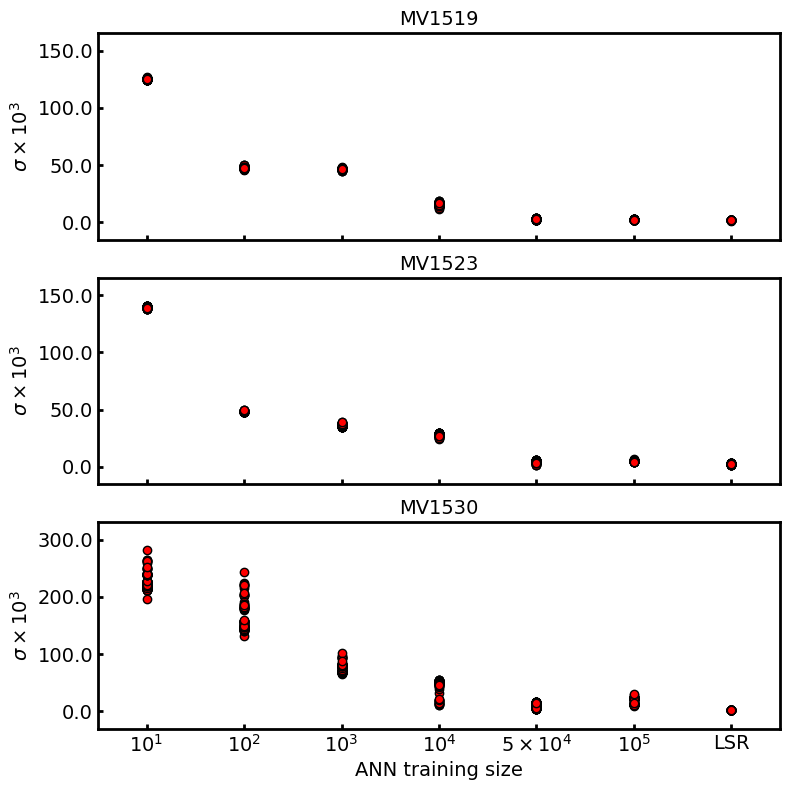

In [179]:

os.chdir(r'XXXX')  ########## PLEASE PUT THE DIRECTORY WHERE YOU WOULD LIKE TO HAVE THESE PLOTS STORED####################


font_properties = {'fontsize': 11, 'fontweight': 'normal', 'family': 'sans-serif'}

# Create a figure and axes for the subplots
fig, axs = plt.subplots(3, 1, figsize=(8, 8))

tick_labels = ['$10^{1}$ ', '$10^{2}$', '$10^{3}$' , '$10^{4}$', r'$5\times10^{4}$', '$10^{5}$', 'LSR']

# Create box plots for the first dataset
boxplot1 = axs[0].boxplot(data1,       
            vert=True, 
            patch_artist=True, 
            flierprops=dict(marker='', color='red', alpha=0.5),
            boxprops=dict(linewidth=3),
            whiskerprops=dict(linewidth=3), 
            medianprops=dict(color='black', linewidth=3))  # Vertical box plots
axs[0].set_title('MV1519', fontsize=14)
axs[0].set_ylabel(r'$σ \times 10^{3}$', fontsize=14)
axs[0].set_ylim(-0.015, 0.165)
axs[0].set_yticks(np.arange(0.00, 0.151, 0.05))
axs[0].set_xticklabels([])
axs[0].tick_params(axis='both', which='major', labelsize=14)  # Adjust labelsize as needed
#custom_ticks = np.linspace(0.05, 0.03, 6) 
#axs[0].set_ylim(-0.005, 0.03)
#axs[0].set_yticks(custom_ticks)



# Create box plots for the second dataset
boxplot2 = axs[1].boxplot(data2,        
            vert=True, 
            patch_artist=True, 
            flierprops=dict(marker='', color='red', alpha=0.5),
            boxprops=dict(linewidth=3),
            whiskerprops=dict(linewidth=3), 
            medianprops=dict(color='black', linewidth=3))
axs[1].set_title('MV1523', fontsize=14)
axs[1].set_ylim(-0.015, 0.165)
axs[1].set_yticks(np.arange(0.00, 0.151, 0.05))
axs[1].set_ylabel(r'$σ \times 10^{3}$', fontsize=14)
axs[1].set_xticklabels([])
axs[1].tick_params(axis='both', which='major', labelsize=14)  # Adjust labelsize as needed
#axs[1].set_ylim(-3, 4)

# Create box plots for the third dataset
boxplot3 = axs[2].boxplot(data3,    
            vert=True, 
            patch_artist=True, 
            flierprops=dict(marker='', color='red', alpha=0.5),
            boxprops=dict(linewidth=3),
            whiskerprops=dict(linewidth=3), 
            medianprops=dict(color='black', linewidth=3))
axs[2].set_title('MV1530', fontsize=14)
axs[2].set_ylabel(r'$σ \times 10^{3}$', fontsize=14)
axs[2].set_xlabel('ANN training size', fontsize=14)
axs[2].set_xticklabels(tick_labels, fontdict=font_properties)
axs[2].tick_params(axis='both', which='major', labelsize=14)  # Adjust labelsize as needed
axs[2].set_yticks(np.arange(0.00, 0.31, 0.1))
axs[2].set_ylim(-0.03, 0.33)

# Hide the box and whisker lines
for box in boxplot1['boxes']:
    box.set_visible(False)  # Hide the box

for whisker in boxplot1['whiskers']:
    whisker.set_visible(False)  # Hide the whiskers

# Optional: You can still display the median and fliers
for median in boxplot1['medians']:
    median.set_visible(False)  # Keep the median line visible

for flier in boxplot1['fliers']:
    flier.set_visible(False)  # Keep the outliers visible

for cap in boxplot1['caps']:
    cap.set_visible(False)  # Hide the caps

# Hide the box and whisker lines
for box in boxplot2['boxes']:
    box.set_visible(False)  # Hide the box

for whisker in boxplot2['whiskers']:
    whisker.set_visible(False)  # Hide the whiskers

# Optional: You can still display the median and fliers
for median in boxplot2['medians']:
    median.set_visible(False)  # Keep the median line visible

for flier in boxplot2['fliers']:
    flier.set_visible(False)  # Keep the outliers visible

for cap in boxplot2['caps']:
    cap.set_visible(False)  # Hide the caps


# Hide the box and whisker lines
for box in boxplot3['boxes']:
    box.set_visible(False)  # Hide the box

for whisker in boxplot3['whiskers']:
    whisker.set_visible(False)  # Hide the whiskers

# Optional: You can still display the median and fliers
for median in boxplot3['medians']:
    median.set_visible(False)  # Keep the median line visible

for flier in boxplot3['fliers']:
    flier.set_visible(False)  # Keep the outliers visible

for cap in boxplot3['caps']:
    cap.set_visible(False)  # Hide the caps


for ax in axs:
    ax.spines['top'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)

    # Make ticks point inward
    ax.tick_params(direction='in', width=2)



for i in range(len(data1)):
    axs[0].scatter([i + 1] * len(data1[i]), data1[i], color='red', marker='o', edgecolor = 'black')
    axs[1].scatter([i + 1] * len(data2[i]), data2[i], color='red', marker='o', edgecolor = 'black')
    axs[2].scatter([i + 1] * len(data3[i]), data3[i], color='red', marker='o', edgecolor = 'black')


#for i, label in enumerate(plt.gca().get_xticklabels()):
    #if label.get_text() == 'LSR':
        #label.set_y(label.get_position()[1] - 0.01)  # Move Group A up



def format_ticks(x, _):
    return f'{x * 1000:.1f}'  # Multiply by scale_factor

for ax in axs:
    ax.yaxis.set_major_formatter(FuncFormatter(format_ticks))


# Adjust layout
plt.tight_layout()

# Show the plot
plt.savefig("ANN_Sigma.jpg",  dpi=300, bbox_inches='tight' )
plt.show()



This next section will be making scatter plot figures comparing each predicted value to the either the ground truth values in the case of simulated data or the traditional least-squuare regression data in the case of experimental data. These plots will be generated for the versions of ANN3 and ANN4 that are trained with a set sixe of 50000

In [202]:
os.chdir(r'XXXX')  ########## PLEASE PUT THE DIRECTORY WHERE YOU WOULD LIKE TO HAVE THESE PLOTS STORED####################

df1 = pd.DataFrame(ANN3_50000_test) # Store Si_ANN test predictions
df2 = pd.DataFrame(ANN4_50000_test) # Store SLG_ANN test predictions

df3 = pd.DataFrame(y_test_DS1) # Store ground truth for Si test set
df4 = pd.DataFrame(y_test_DS2) # Store ground truth for SLG test set

############### Ep Plot ################################################
key = 'Ep'

y = pd.concat( [df1[str(key)], df2[str(key)] ], ignore_index=True) # concatenate model predictions 
x = pd.concat( [df3[str(key)], df4[str(key)] ], ignore_index=True) # concatenate ground truth values

x_line = np.linspace(min(x),max(x), 20)

plt.xlim (min(x) , max(x)) # set limits on x in graph
plt.ylim(min(x), max(x) ) # set limits on Y in graph


# Calculate the residuals for slope = 1
residuals = y - x  # Since we want lines of the form y = x + b

# Calculate the upper and lower bounds for 95% of the data
lower_bound = np.percentile(residuals, 0.5)
upper_bound = np.percentile(residuals, 99.5)

# Calculate the intercepts
Ep_intercept_lower = -lower_bound
Ep_intercept_upper = -upper_bound

plt.scatter(y_test_DS1[key], ANN3_50000_test[key], s=15,  color='blue', label='Si Test Set' )
plt.scatter(y_test_DS2[key], ANN4_50000_test[key], s=15, color='green', label='SLG Test Set'  )

plt.plot(x_line, x_line, color='Black', linewidth= 2 )
#plt.plot(x_line, .95 * x_line, color='Black', linestyle='--', linewidth= 2)
#plt.plot(x_line, 1.05*x_line, color='Black', linestyle='--',  linewidth= 2)
plt.plot(x_line, x_line + Ep_intercept_lower, color='Black', linestyle='--', linewidth = 2 )
plt.plot(x_line, x_line + Ep_intercept_upper, color='Black', linestyle='--', linewidth = 2)

plt.scatter(MV1519_params[str(key)], ANN3_50000_MV1519[str(key)], s=15, color='lime', label='MV1519' )
plt.scatter(MV1523_params[str(key)], ANN3_50000_MV1523[str(key)],  s=15, color='red', label='MV1523' )
plt.scatter(MV1530_params[str(key)], ANN4_50000_MV1530[str(key)], s=15, color='purple', label='MV1530')

print('$E_{p}$ ± ' + str(round(upper_bound,5)))


plt.legend(fontsize='small', frameon=False, loc='best')
#plt.title(str(key) + ': ANN_50000')
plt.xlabel('Ground Truth $E_{p}$ (eV)')
plt.ylabel('ANN $E_{p} (eV)$')

# Plot configurations


ax = plt.gca()

# Set the linewidth of the axis lines
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

plt.tick_params(axis='both', which='major', width=2)  # Adjust 'width' for thickness
plt.tick_params(axis='both', which='minor', width=1)  # Optionally adjust minor ticks

# Get current axes
ax = plt.gca()

# Set the tick marks to point inside
ax.tick_params(axis='both', direction='in')

x_ticks = plt.xticks()[0]  # Get current x-ticks
plt.xticks(x_ticks[1:7])
y_ticks = plt.yticks()[0]  # Get current x-ticks
plt.yticks(y_ticks[1:7])



plt.savefig("ANN_50000 " + str(key) + ".jpg", dpi=300, bbox_inches='tight' )  # Saves the plot as a PDF file
plt.close()


############### Ep Plot End ################################################


df1 = pd.DataFrame(ANN3_50000_test) # Store Si_ANN test predictions
df2 = pd.DataFrame(ANN4_50000_test) # Store SLG_ANN test predictions

df3 = pd.DataFrame(y_test_DS1) # Store ground truth for Si test set
df4 = pd.DataFrame(y_test_DS2) # Store ground truth for SLG test set

############### Eg Plot ################################################
key = 'Eg'

y = pd.concat( [df1[str(key)], df2[str(key)] ], ignore_index=True) # concatenate model predictions 
x = pd.concat( [df3[str(key)], df4[str(key)] ], ignore_index=True) # concatenate ground truth values

x_line = np.linspace(min(x),max(x), 20)

plt.xlim (min(x) , max(x)) # set limits on x in graph
plt.ylim(min(x), max(x) ) # set limits on Y in graph

# Calculate the residuals for slope = 1
residuals = y - x  # Since we want lines of the form y = x + b

# Calculate the upper and lower bounds for 95% of the data
lower_bound = np.percentile(residuals, 0.5)
upper_bound = np.percentile(residuals, 99.5)

# Calculate the intercepts
Eg_intercept_lower = -lower_bound
Eg_intercept_upper = -upper_bound


plt.scatter(y_test_DS1[key], ANN3_50000_test[key], s=15, color='blue', label='Si Test Set' )
plt.scatter(y_test_DS2[key], ANN4_50000_test[key], s=15, color='green', label='SLG Test Set'  )

plt.plot(x_line, x_line, color='Black', linewidth= 2 )
plt.plot(x_line, x_line + Eg_intercept_lower , color='Black', linestyle='--', linewidth= 2)
plt.plot(x_line, x_line + Eg_intercept_upper, color='Black', linestyle='--',  linewidth= 2)
#plt.plot(x_line, .90 * x_line, color='Black', linestyle=':', linewidth = 2)
#plt.plot(x_line, 1.1 * x_line, color='Black', linestyle=':', linewidth = 2)

plt.scatter(MV1519_params[str(key)], ANN3_50000_MV1519[str(key)], s=15, color='lime', label='MV1519' )
plt.scatter(MV1523_params[str(key)], ANN3_50000_MV1523[str(key)],  s=15, color='red', label='MV1523' )
plt.scatter(MV1530_params[str(key)], ANN4_50000_MV1530[str(key)], s=15, color='purple', label='MV1530')

print('$E_{g}$ ± ' + str(round(upper_bound,5)))



plt.legend(fontsize='small', frameon=False, loc='best')
#plt.title(str(key) + ': ANN_50000')
plt.xlabel('Ground Truth $E_{g}$ (eV)')
plt.ylabel('ANN $E_{g}$ (eV)')

# Plot configurations
 

ax = plt.gca()

# Set the linewidth of the axis lines
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

plt.xticks([1.25, 1.5, 1.75, 2, 2.25])  # Specify the x-ticks
plt.yticks([1.25, 1.5, 1.75, 2, 2.25])  # Specify the y-ticks

plt.tick_params(axis='both', which='major', width=2)  # Adjust 'width' for thickness
plt.tick_params(axis='both', which='minor', width=1)  # Optionally adjust minor ticks

# Get current axes
ax = plt.gca()

# Set the tick marks to point inside
ax.tick_params(axis='both', direction='in')

#x_ticks = plt.xticks()[0]  # Get current x-ticks
#plt.xticks(x_ticks[1:7])
#y_ticks = plt.yticks()[0]  # Get current x-ticks
#plt.yticks(y_ticks[1:7])



plt.savefig("ANN_50000 " + str(key) + ".jpg", dpi=300, bbox_inches='tight' )  # Saves the plot as a PDF file
plt.close()

############### Eg Plot End ################################################



df1 = pd.DataFrame(ANN3_50000_test) # Store Si_ANN test predictions
df2 = pd.DataFrame(ANN4_50000_test) # Store SLG_ANN test predictions

df3 = pd.DataFrame(y_test_DS1) # Store ground truth for Si test set
df4 = pd.DataFrame(y_test_DS2) # Store ground truth for SLG test set

############### Eo Plot  ################################################
key = 'Eo'

y = pd.concat( [df1[str(key)], df2[str(key)] ], ignore_index=True) # concatenate model predictions 
x = pd.concat( [df3[str(key)], df4[str(key)] ], ignore_index=True) # concatenate ground truth values

x_line = np.linspace(min(x),max(x), 20)

plt.xlim (min(x) , max(x)) # set limits on x in graph
plt.ylim(min(x), max(x) ) # set limits on Y in graph


# Calculate the residuals for slope = 1
residuals = y - x  # Since we want lines of the form y = x + b

# Calculate the upper and lower bounds for 95% of the data
lower_bound = np.percentile(residuals, 0.5)
upper_bound = np.percentile(residuals, 99.5)

# Calculate the intercepts
Eo_intercept_lower = -lower_bound
Eo_intercept_upper = -upper_bound



plt.scatter(y_test_DS1[key], ANN3_50000_test[key], s=15, color='blue', label='Si Test Set' )
plt.scatter(y_test_DS2[key], ANN4_50000_test[key], s=15, color='green', label='SLG Test Set'  )

plt.plot(x_line, x_line, color='Black', linewidth= 2 )
plt.plot(x_line, x_line + Eo_intercept_lower, color='Black', linestyle='--', linewidth= 2)
plt.plot(x_line, x_line + Eo_intercept_upper, color='Black', linestyle='--',  linewidth= 2)
#plt.plot(x_line, .90 * x_line, color='Black', linestyle=':', linewidth = 2)
#plt.plot(x_line, 1.1 * x_line, color='Black', linestyle=':', linewidth = 2)

plt.scatter(MV1519_params[str(key)], ANN3_50000_MV1519[str(key)], s=15, color='lime', label='MV1519' )
plt.scatter(MV1523_params[str(key)], ANN3_50000_MV1523[str(key)],  s=15, color='red', label='MV1523' )
plt.scatter(MV1530_params[str(key)], ANN4_50000_MV1530[str(key)], s=15, color='purple', label='MV1530')

print('$E_{0}$ ± ' + str(round(upper_bound,5)))


plt.legend(fontsize='small', frameon=False, loc='best')
#plt.title(str(key) + ': ANN_50000')
plt.xlabel('Ground Truth $E_{0}$ (eV)')
plt.ylabel('ANN $E_{0}$ (eV)')

# Plot configurations


ax = plt.gca()

# Set the linewidth of the axis lines
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

plt.tick_params(axis='both', which='major', width=2)  # Adjust 'width' for thickness
plt.tick_params(axis='both', which='minor', width=1)  # Optionally adjust minor ticks

# Get current axes
ax = plt.gca()

# Set the tick marks to point inside
ax.tick_params(axis='both', direction='in')

x_ticks = plt.xticks()[0]  # Get current x-ticks
plt.xticks(x_ticks[1:8])
y_ticks = plt.yticks()[0]  # Get current x-ticks
plt.yticks(y_ticks[1:8])



plt.savefig("ANN_50000 " + str(key) + ".jpg", dpi=300, bbox_inches='tight' )  # Saves the plot as a PDF file
plt.close()

############### Eo Plot End ################################################


df1 = pd.DataFrame(ANN3_50000_test) # Store Si_ANN test predictions
df2 = pd.DataFrame(ANN4_50000_test) # Store SLG_ANN test predictions

df3 = pd.DataFrame(y_test_DS1) # Store ground truth for Si test set
df4 = pd.DataFrame(y_test_DS2) # Store ground truth for SLG test set

############### Bulk Plot ################################################
key = 'BulkT'

y = pd.concat( [df1[str(key)], df2[str(key)] ], ignore_index=True) # concatenate model predictions 
x = pd.concat( [df3[str(key)], df4[str(key)] ], ignore_index=True) # concatenate ground truth values

x_line = np.linspace(min(x),max(x), 20)

plt.xlim (min(x) , max(x)) # set limits on x in graph
plt.ylim(min(x), max(x) ) # set limits on Y in graph



# Calculate the residuals for slope = 1
residuals = y - x  # Since we want lines of the form y = x + b

# Calculate the upper and lower bounds for 95% of the data
lower_bound = np.percentile(residuals, 0.5)
upper_bound = np.percentile(residuals, 99.5)

# Calculate the intercepts
Bulkt_intercept_lower = -lower_bound
Bulkt_intercept_upper = -upper_bound


plt.scatter(y_test_DS1[key], ANN3_50000_test[key], s=15, color='blue', label='Si Test Set' )
plt.scatter(y_test_DS2[key], ANN4_50000_test[key], s=15, color='green', label='SLG Test Set'  )

plt.plot(x_line, x_line, color='Black', linewidth= 2 )
plt.plot(x_line, Bulkt_intercept_lower + x_line, color='Black', linestyle='--', linewidth= 2)
plt.plot(x_line, Bulkt_intercept_upper + x_line, color='Black', linestyle='--',  linewidth= 2)
#plt.plot(x_line, .90 * x_line, color='Black', linestyle=':', linewidth = 2)
#plt.plot(x_line, 1.1 * x_line, color='Black', linestyle=':', linewidth = 2)

plt.scatter(MV1519_params[str(key)], ANN3_50000_MV1519[str(key)], s=15, color='lime', label='MV1519' )
plt.scatter(MV1523_params[str(key)], ANN3_50000_MV1523[str(key)],  s=15, color='red', label='MV1523' )
plt.scatter(MV1530_params[str(key)], ANN4_50000_MV1530[str(key)], s=15, color='purple', label='MV1530')


print('BulkT ± ' + str(round(upper_bound,5)))

plt.legend(fontsize='small', frameon=False, loc='best')
#plt.title(str(key) + ': ANN_50000')
plt.xlabel('Ground Truth Bulk Thickness (nm)')
plt.ylabel('ANN Bulk Thickness (nm)')

# Plot configurations


ax = plt.gca()

# Set the linewidth of the axis lines
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

plt.tick_params(axis='both', which='major', width=2)  # Adjust 'width' for thickness
plt.tick_params(axis='both', which='minor', width=1)  # Optionally adjust minor ticks

# Get current axes
ax = plt.gca()

# Set the tick marks to point inside
ax.tick_params(axis='both', direction='in')

x_ticks = plt.xticks()[0]  # Get current x-ticks
plt.xticks(x_ticks[1:6])
y_ticks = plt.yticks()[0]  # Get current x-ticks
plt.yticks(y_ticks[1:6])



plt.savefig("ANN_50000 " + str(key) + ".jpg", dpi=300, bbox_inches='tight' )  # Saves the plot as a PDF file
plt.close()

############### Bulk Plot End ################################################


df1 = pd.DataFrame(ANN3_50000_test) # Store Si_ANN test predictions
df2 = pd.DataFrame(ANN4_50000_test) # Store SLG_ANN test predictions

df3 = pd.DataFrame(y_test_DS1) # Store ground truth for Si test set
df4 = pd.DataFrame(y_test_DS2) # Store ground truth for SLG test set

############### Br Plot ################################################

key = 'Br'

y = pd.concat( [df1[str(key)], df2[str(key)] ], ignore_index=True) # concatenate model predictions 
x = pd.concat( [df3[str(key)], df4[str(key)] ], ignore_index=True) # concatenate ground truth values

x_line = np.linspace(min(x),max(x), 20)

plt.xlim (min(x) , max(x)) # set limits on x in graph
plt.ylim(min(x), max(x) ) # set limits on Y in graph


# Calculate the residuals for slope = 1
residuals = y - x  # Since we want lines of the form y = x + b

# Calculate the upper and lower bounds for 95% of the data
lower_bound = np.percentile(residuals, 0.5)
upper_bound = np.percentile(residuals, 99.5)

# Calculate the intercepts
Br_intercept_lower = -lower_bound
Br_intercept_upper = -upper_bound



plt.scatter(y_test_DS1[key], ANN3_50000_test[key], s=15, color='blue', label='Si Test Set' )
plt.scatter(y_test_DS2[key], ANN4_50000_test[key], s=15, color='green', label='SLG Test Set'  )

plt.plot(x_line, x_line, color='Black', linewidth= 2 )
plt.plot(x_line, Br_intercept_lower + x_line, color='Black', linestyle='--', linewidth= 2)
plt.plot(x_line, Br_intercept_upper + x_line, color='Black', linestyle='--',  linewidth= 2)
#plt.plot(x_line, .90 * x_line, color='Black', linestyle=':', linewidth = 2)
#plt.plot(x_line, 1.1 * x_line, color='Black', linestyle=':', linewidth = 2)

plt.scatter(MV1519_params[str(key)], ANN3_50000_MV1519[str(key)], s=15, color='lime', label='MV1519' )
plt.scatter(MV1523_params[str(key)], ANN3_50000_MV1523[str(key)],  s=15, color='red', label='MV1523' )
plt.scatter(MV1530_params[str(key)], ANN4_50000_MV1530[str(key)], s=15, color='purple', label='MV1530')

print('Br ± ' + str(round(upper_bound,5)))


plt.legend(fontsize='small', frameon=False, loc='best')
#plt.title(str(key) + ': ANN_50000')
plt.xlabel('Ground Truth ' + r'$/Gamma$ (eV)')
plt.ylabel('ANN ' + r'$/Gamma$ (eV)')

# Plot configurations


ax = plt.gca()

# Set the linewidth of the axis lines
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

plt.tick_params(axis='both', which='major', width=2)  # Adjust 'width' for thickness
plt.tick_params(axis='both', which='minor', width=1)  # Optionally adjust minor ticks

# Get current axes
ax = plt.gca()

# Set the tick marks to point inside
ax.tick_params(axis='both', direction='in')

x_ticks = plt.xticks()[0]  # Get current x-ticks
plt.xticks(x_ticks[1:8])
y_ticks = plt.yticks()[0]  # Get current x-ticks
plt.yticks(y_ticks[1:8])



plt.savefig("ANN_50000 " + str(key) + ".jpg", dpi=300, bbox_inches='tight' )  # Saves the plot as a PDF file
plt.close()

############### Br Plot End ################################################


df1 = pd.DataFrame(ANN3_50000_test) # Store Si_ANN test predictions
df2 = pd.DataFrame(ANN4_50000_test) # Store SLG_ANN test predictions

df3 = pd.DataFrame(y_test_DS1) # Store ground truth for Si test set
df4 = pd.DataFrame(y_test_DS2) # Store ground truth for SLG test set

############### Amp Plot ################################################
key = 'Amp'

y = pd.concat( [df1[str(key)], df2[str(key)] ], ignore_index=True) # concatenate model predictions 
x = pd.concat( [df3[str(key)], df4[str(key)] ], ignore_index=True) # concatenate ground truth values

x_line = np.linspace(min(x),max(x), 20)

plt.xlim (min(x) , max(x)) # set limits on x in graph
plt.ylim(min(x), max(x) ) # set limits on Y in graph



# Calculate the residuals for slope = 1
residuals = y - x  # Since we want lines of the form y = x + b

# Calculate the upper and lower bounds for 95% of the data
lower_bound = np.percentile(residuals, 0.5)
upper_bound = np.percentile(residuals, 99.5)

# Calculate the intercepts
Amp_intercept_lower = -lower_bound
Amp_intercept_upper = -upper_bound




plt.scatter(y_test_DS1[key], ANN3_50000_test[key], s=15, color='blue', label='Si Test Set' )
plt.scatter(y_test_DS2[key], ANN4_50000_test[key], s=15, color='green', label='SLG Test Set'  )

plt.plot(x_line, x_line, color='Black', linewidth= 2 )
plt.plot(x_line, Amp_intercept_lower + x_line, color='Black', linestyle='--', linewidth= 2)
plt.plot(x_line, Amp_intercept_upper + x_line, color='Black', linestyle='--',  linewidth= 2)
#plt.plot(x_line, .90 * x_line, color='Black', linestyle=':', linewidth = 2)
#plt.plot(x_line, 1.1 * x_line, color='Black', linestyle=':', linewidth = 2)

plt.scatter(MV1519_params[str(key)], ANN3_50000_MV1519[str(key)], s=15, color='lime', label='MV1519' )
plt.scatter(MV1523_params[str(key)], ANN3_50000_MV1523[str(key)],  s=15, color='red', label='MV1523' )
plt.scatter(MV1530_params[str(key)], ANN4_50000_MV1530[str(key)], s=15, color='purple', label='MV1530')

print('Amp ± ' + str(round(upper_bound,5)))


plt.legend(fontsize='small', frameon=False, loc='best')
#plt.title(str(key) + ': ANN_50000')
plt.xlabel('Ground Truth $A$ (eV)')
plt.ylabel('ANN $A$ (eV)')

# Plot configurations


ax = plt.gca()

# Set the linewidth of the axis lines
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

plt.tick_params(axis='both', which='major', width=2)  # Adjust 'width' for thickness
plt.tick_params(axis='both', which='minor', width=1)  # Optionally adjust minor ticks

# Get current axes
ax = plt.gca()

# Set the tick marks to point inside
ax.tick_params(axis='both', direction='in')

x_ticks = plt.xticks()[0]  # Get current x-ticks
plt.xticks(x_ticks[1:6])
y_ticks = plt.yticks()[0]  # Get current x-ticks
plt.yticks(y_ticks[1:6])



plt.savefig("ANN_50000 " + str(key) + ".jpg", dpi=300, bbox_inches='tight' )  # Saves the plot as a PDF file
plt.close()


############### Amp Plot End ################################################


df1 = pd.DataFrame(ANN3_50000_test) # Store Si_ANN test predictions
df2 = pd.DataFrame(ANN4_50000_test) # Store SLG_ANN test predictions

df3 = pd.DataFrame(y_test_DS1) # Store ground truth for Si test set
df4 = pd.DataFrame(y_test_DS2) # Store ground truth for SLG test set

############### EMAT Plot ################################################
key = 'EMAT'

y = df2[str(key)]
x = df4[str(key)]

x_line = np.linspace(min(x),max(x), 20)

plt.xlim (min(x) , max(x)) # set limits on x in graph
plt.ylim(min(x), max(x) ) # set limits on Y in graph



# Calculate the residuals for slope = 1
residuals = y - x  # Since we want lines of the form y = x + b

# Calculate the upper and lower bounds for 95% of the data
lower_bound = np.percentile(residuals, 0.5)
upper_bound = np.percentile(residuals, 99.5)

# Calculate the intercepts
EMAT_intercept_lower = -lower_bound
EMAT_intercept_upper = -upper_bound



#plt.scatter(y_test_DS1[key], ANN3_50000_test[key], s=15, color='blue', label='Si Test Set' )
plt.scatter(y_test_DS2[key], ANN4_50000_test[key], s=15, color='green', label='SLG Test Set'  )

plt.plot(x_line, x_line, color='Black', linewidth= 2 )
#plt.plot(x_line, .95 * x_line, color='Black', linestyle='--', linewidth= 2)
#plt.plot(x_line, 1.05*x_line, color='Black', linestyle='--',  linewidth= 2)
plt.plot(x_line, EMAT_intercept_lower+ x_line, color='Black', linestyle='--', linewidth = 2)
plt.plot(x_line, EMAT_intercept_upper+ x_line, color='Black', linestyle='--', linewidth = 2)

#plt.scatter(MV1519_params[str(key)], ANN3_50000_MV1519[str(key)], s=15, color='lime', label='MV1519' )
#plt.scatter(MV1523_params[str(key)], ANN3_50000_MV1523[str(key)],  s=15, color='red', label='MV1523' )
plt.scatter(MV1530_params[str(key)], ANN4_50000_MV1530[str(key)], s=15, color='purple', label='MV1530')

print('EMAT ± ' + str(round(upper_bound,5)))


plt.legend(fontsize='small', frameon=False, loc='best')
#plt.title(str(key) + ': ANN_50000')
plt.xlabel('Ground Truth Surface Layer Thickness (nm)')
plt.ylabel('ANN Surface Layer Thickness (nm)')

# Plot configurations


ax = plt.gca()

# Set the linewidth of the axis lines
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

plt.tick_params(axis='both', which='major', width=2)  # Adjust 'width' for thickness
plt.tick_params(axis='both', which='minor', width=1)  # Optionally adjust minor ticks

# Get current axes
ax = plt.gca()

# Set the tick marks to point inside
ax.tick_params(axis='both', direction='in')

x_ticks = plt.xticks()[0]  # Get current x-ticks
plt.xticks(x_ticks[1:8])
y_ticks = plt.yticks()[0]  # Get current x-ticks
plt.yticks(y_ticks[1:8])



plt.savefig("ANN_50000 " + str(key) + ".jpg", dpi=300, bbox_inches='tight' )  # Saves the plot as a PDF file
plt.close()

############### EMAT Plot End ################################################



$E_{p}$ ± 0.34605
$E_{g}$ ± 0.12764
$E_{0}$ ± 0.10929
BulkT ± 3.70899
Br ± 0.13814
Amp ± 10.55799
EMAT ± 0.20545


For the final exercises, the values predicted by ANN3 and ANN4 will be used as input for a least-square regression in python to confirm that the ANN predictions can lead to a good fit. 

Now a function that can take predictions from ANN3 and perfrom least-square regression will be defined

In [208]:
def LSR_ANN3(ANN3_predictions, experimental_data): 

    LSR_Params = [] # store final parameters after the LSR
    LSR_Times = [] # store the times it takes to fit each point

    for i in range(len(ANN3_predictions['Ep'])): # iteratre over every prediction

        # Take predictions from ANN
        initial_params = np.array([
             ANN3_predictions['Ep'][i], 
             ANN3_predictions['Eg'][i], 
             ANN3_predictions['Eo'][i], 
             ANN3_predictions['Br'][i],
             ANN3_predictions['Amp'][i],
             ANN3_predictions['BulkT'][i],
             ])

        timestamp1 = time.time() # start timer
         # Perform least-square regression
        params = LSR(E, experimental_data[i][:, 1:] , initial_params, EMA = False)
        timestamp2 = time.time() # end timer

        iteration_time = timestamp2 - timestamp1 # calculate time delta
        print("Iteration time: " + str(iteration_time)) # print time delta

        LSR_Params.append(params)  # save parameters 
        LSR_Times.append(iteration_time)  # save parameters 

    return(LSR_Params, LSR_Times)

    

In [ ]:
# LSR for ANN3 trained on 100000 for MV1519
ANN3_100000_MV1519_LSR_params, ANN3_100000_MV1519_LSR_times = LSR_ANN3(ANN3_100000_MV1519, MV1519)

In [ ]:
# LSR for ANN3 trained on 50000 for MV1519
ANN3_50000_MV1519_LSR_params, ANN3_50000_MV1519_LSR_times = LSR_ANN3(ANN3_50000_MV1519, MV1519)

In [ ]:
# LSR for ANN3 trained on 10000 for MV1519
ANN3_10000_MV1519_LSR_params, ANN3_10000_MV1519_LSR_times = LSR_ANN3(ANN3_10000_MV1519, MV1519)

In [ ]:
# LSR for ANN3 trained on 1000 for MV1519
ANN3_1000_MV1519_LSR_params, ANN3_1000_MV1519_LSR_times = LSR_ANN3(ANN3_1000_MV1519, MV1519)

In [ ]:
# LSR for ANN3 trained on 100 for MV1519
ANN3_100_MV1519_LSR_params, ANN3_100_MV1519_LSR_times = LSR_ANN3(ANN3_100_MV1519, MV1519)

In [ ]:
# LSR for ANN3 trained on 10 for MV1519
ANN3_10_MV1519_LSR_params, ANN3_10_MV1519_LSR_times = LSR_ANN3(ANN3_10_MV1519, MV1519)

In [ ]:
# LSR for ANN3 trained on 100000 for MV1523
ANN3_100000_MV1523_LSR_params, ANN3_100000_MV1523_LSR_times = LSR_ANN3(ANN3_100000_MV1523, MV1523)

In [ ]:
# LSR for ANN3 trained on 50000 for MV1523
ANN3_50000_MV1523_LSR_params, ANN3_50000_MV1523_LSR_times = LSR_ANN3(ANN3_50000_MV1523, MV1523)

In [ ]:
# LSR for ANN3 trained on 10000 for MV1523
ANN3_10000_MV1523_LSR_params, ANN3_10000_MV1523_LSR_times = LSR_ANN3(ANN3_10000_MV1523, MV1523)

In [ ]:
# LSR for ANN3 trained on 1000 for MV1523
ANN3_1000_MV1523_LSR_params, ANN3_1000_MV1523_LSR_times = LSR_ANN3(ANN3_1000_MV1523, MV1523)

In [ ]:
# LSR for ANN3 trained on 100 for MV1523
ANN3_100_MV1523_LSR_params, ANN3_100_MV1523_LSR_times = LSR_ANN3(ANN3_100_MV1523, MV1523)

In [ ]:
# LSR for ANN3 trained on 10 for MV1523
ANN3_10_MV1523_LSR_params, ANN3_10_MV1523_LSR_times = LSR_ANN3(ANN3_10_MV1523, MV1523)

Now a function that can take predictions from ANN4 and perfrom least-square regression will be defined

In [214]:
def LSR_ANN4(ANN3_predictions, experimental_data): 

    LSR_Params = [] # store final parameters after the LSR
    LSR_Times = [] # store the times it takes to fit each point

    for i in range(len(ANN3_predictions['Ep'])): # iteratre over every prediction

        # Take predictions from ANN
        initial_params = np.array([
             ANN3_predictions['Ep'][i], 
             ANN3_predictions['Eg'][i], 
             ANN3_predictions['Eo'][i], 
             ANN3_predictions['Br'][i],
             ANN3_predictions['Amp'][i],
             ANN3_predictions['BulkT'][i],
             ANN3_predictions['EMAT'][i],
             ])

        timestamp1 = time.time() # start timer
         # Perform least-square regression
        params = LSR(E, experimental_data[i][:, 1:] , initial_params, EMA = True)
        timestamp2 = time.time() # end timer

        iteration_time = timestamp2 - timestamp1 # calculate time delta
        print("Iteration time: " + str(iteration_time)) # print time delta

        LSR_Params.append(params)  # save parameters 
        LSR_Times.append(iteration_time)  # save parameters 

    return(LSR_Params, LSR_Times)

   

In [ ]:
# LSR for ANN4 trained on 100000 for MV1530
ANN4_100000_MV1530_LSR_params, ANN4_100000_MV1530_LSR_times = LSR_ANN4(ANN4_100000_MV1530, MV1530)

In [ ]:
# LSR for ANN4 trained on 50000 for MV1530
ANN4_50000_MV1530_LSR_params, ANN4_50000_MV1530_LSR_times = LSR_ANN4(ANN4_50000_MV1530, MV1530)

In [ ]:
# LSR for ANN4 trained on 10000 for MV1530
ANN4_10000_MV1530_LSR_params, ANN4_10000_MV1530_LSR_times = LSR_ANN4(ANN4_10000_MV1530, MV1530)

In [ ]:
# LSR for ANN4 trained on 1000 for MV1530
ANN4_1000_MV1530_LSR_params, ANN4_1000_MV1530_LSR_times = LSR_ANN4(ANN4_1000_MV1530, MV1530)

In [ ]:
# LSR for ANN4 trained on 100 for MV1530
ANN4_100_MV1530_LSR_params, ANN4_100_MV1530_LSR_times = LSR_ANN4(ANN4_100_MV1530, MV1530)

In [ ]:
# LSR for ANN4 trained on 10 for MV1530
ANN4_10_MV1530_LSR_params, ANN4_10_MV1530_LSR_times = LSR_ANN4(ANN4_10_MV1530, MV1530)

Now all the data from this least-square regression process can be stored

In [253]:
# Store data here from MV1530
os.chdir(r'XXXX')  ########## PLEASE PUT THE DIRECTORY WHERE YOU WOULD LIKE TO HAVE THE ANN + LSR DATA STORED####################

columns = [ 'Ep', 'Eg', 'Eo', 'Br', 'Amp', 'BulkT', 'EMAT']

####### Store Parameters from MV1530 analysis ###########
ANN4_10_MV1530_LSR  = pd.DataFrame(ANN4_10_MV1530_LSR_params, columns = columns) 
ANN4_10_MV1530_LSR.to_csv('ANN4_10_MV1530_LSR_params.csv')

ANN4_100_MV1530_LSR = pd.DataFrame(ANN4_100_MV1530_LSR_params, columns = columns) 
ANN4_100_MV1530_LSR.to_csv('ANN4_100_MV1530_LSR_params.csv')

ANN4_1000_MV1530_LSR = pd.DataFrame(ANN4_1000_MV1530_LSR_params, columns = columns) 
ANN4_1000_MV1530_LSR.to_csv('ANN4_1000_MV1530_LSR_params.csv')

ANN4_10000_MV1530_LSR = pd.DataFrame(ANN4_10000_MV1530_LSR_params, columns = columns) 
ANN4_10000_MV1530_LSR.to_csv('ANN4_10000_MV1530_LSR_params.csv')

ANN4_50000_MV1530_LSR = pd.DataFrame(ANN4_50000_MV1530_LSR_params, columns = columns) 
ANN4_50000_MV1530_LSR.to_csv('ANN4_50000_MV1530_LSR_params.csv')

ANN4_100000_MV1530_LSR = pd.DataFrame(ANN4_100000_MV1530_LSR_params, columns = columns) 
ANN4_100000_MV1530_LSR.to_csv('ANN4_100000_MV1530_LSR_params.csv')

####### Store times from MV1530 analysis ###########
df = pd.DataFrame(ANN4_10_MV1530_LSR_times) 
df.to_csv('ANN4_10_MV1530_LSR_times.csv')

df = pd.DataFrame(ANN4_100_MV1530_LSR_times) 
df.to_csv('ANN4_100_MV1530_LSR_times.csv')

df = pd.DataFrame(ANN4_1000_MV1530_LSR_times) 
df.to_csv('ANN4_1000_MV1530_LSR_times.csv')

df = pd.DataFrame(ANN4_10000_MV1530_LSR_times) 
df.to_csv('ANN4_10000_MV1530_LSR_times.csv')

df = pd.DataFrame(ANN4_50000_MV1530_LSR_times) 
df.to_csv('ANN4_50000_MV1530_LSR_times.csv')

df = pd.DataFrame(ANN4_100000_MV1530_LSR_times) 
df.to_csv('ANN4_100000_MV1530_LSR_times.csv')



In [257]:
# Store data here from MV1519

os.chdir(r'XXXX')  ########## PLEASE PUT THE DIRECTORY WHERE YOU WOULD LIKE TO HAVE THE ANN + LSR DATA STORED####################

columns = [ 'Ep', 'Eg', 'Eo', 'Br', 'Amp', 'BulkT']

####### Store Parameters from MV1519 analysis ###########
ANN3_10_MV1519_LSR = pd.DataFrame(ANN3_10_MV1519_LSR_params, columns = columns) 
ANN3_10_MV1519_LSR.to_csv('ANN3_10_MV1519_LSR_params.csv')

ANN3_100_MV1519_LSR = pd.DataFrame(ANN3_100_MV1519_LSR_params, columns = columns) 
ANN3_100_MV1519_LSR.to_csv('ANN3_100_MV1519_LSR_params.csv')

ANN3_1000_MV1519_LSR = pd.DataFrame(ANN3_1000_MV1519_LSR_params, columns = columns) 
ANN3_1000_MV1519_LSR.to_csv('ANN3_1000_MV1519_LSR_params.csv')

ANN3_10000_MV1519_LSR = pd.DataFrame(ANN3_10000_MV1519_LSR_params, columns = columns) 
ANN3_10000_MV1519_LSR.to_csv('ANN3_10000_MV1519_LSR_params.csv')

ANN3_50000_MV1519_LSR = pd.DataFrame(ANN3_50000_MV1519_LSR_params, columns = columns) 
ANN3_50000_MV1519_LSR.to_csv('ANN3_50000_MV1519_LSR_params.csv')

ANN3_100000_MV1519_LSR = pd.DataFrame(ANN3_100000_MV1519_LSR_params, columns = columns) 
ANN3_100000_MV1519_LSR.to_csv('ANN3_100000_MV1519_LSR_params.csv')

####### Store times from MV1519 analysis ###########
df = pd.DataFrame(ANN3_10_MV1519_LSR_times) 
df.to_csv('ANN3_10_MV1519_LSR_times.csv')

df = pd.DataFrame(ANN3_100_MV1519_LSR_times) 
df.to_csv('ANN3_100_MV1519_LSR_times.csv')

df = pd.DataFrame(ANN3_1000_MV1519_LSR_times) 
df.to_csv('ANN3_1000_MV1519_LSR_times.csv')

df = pd.DataFrame(ANN3_10000_MV1519_LSR_times) 
df.to_csv('ANN3_10000_MV1519_LSR_times.csv')

df = pd.DataFrame(ANN3_50000_MV1519_LSR_times) 
df.to_csv('ANN3_50000_MV1519_LSR_times.csv')

df = pd.DataFrame(ANN3_100000_MV1519_LSR_times) 
df.to_csv('ANN3_100000_MV1519_LSR_times.csv')



In [259]:
# Store data here from MV1523 

os.chdir(r'XXXX')  ########## PLEASE PUT THE DIRECTORY WHERE YOU WOULD LIKE TO HAVE THE ANN + LSR DATA STORED####################

columns = [ 'Ep', 'Eg', 'Eo', 'Br', 'Amp', 'BulkT']

####### Store Parameters from MV1523 analysis ###########
ANN3_10_MV1523_LSR = pd.DataFrame(ANN3_10_MV1523_LSR_params, columns = columns) 
ANN3_10_MV1523_LSR.to_csv('ANN3_10_MV1523_LSR_params.csv')

ANN3_100_MV1523_LSR = pd.DataFrame(ANN3_100_MV1523_LSR_params, columns = columns) 
ANN3_100_MV1523_LSR.to_csv('ANN3_100_MV1523_LSR_params.csv')

ANN3_1000_MV1523_LSR = pd.DataFrame(ANN3_1000_MV1523_LSR_params, columns = columns) 
ANN3_1000_MV1523_LSR.to_csv('ANN3_1000_MV1523_LSR_params.csv')

ANN3_10000_MV1523_LSR = pd.DataFrame(ANN3_10000_MV1523_LSR_params, columns = columns) 
ANN3_10000_MV1523_LSR.to_csv('ANN3_10000_MV1523_LSR_params.csv')

ANN3_50000_MV1523_LSR = pd.DataFrame(ANN3_50000_MV1523_LSR_params, columns = columns) 
ANN3_50000_MV1523_LSR.to_csv('ANN3_50000_MV1523_LSR_params.csv')

ANN3_100000_MV1523_LSR = pd.DataFrame(ANN3_100000_MV1523_LSR_params, columns = columns) 
ANN3_100000_MV1523_LSR.to_csv('ANN3_100000_MV1523_LSR_params.csv')

####### Store times from MV1523 analysis ###########
df = pd.DataFrame(ANN3_10_MV1523_LSR_times) 
df.to_csv('ANN3_10_MV1523_LSR_times.csv')

df = pd.DataFrame(ANN3_100_MV1523_LSR_times) 
df.to_csv('ANN3_100_MV1523_LSR_times.csv')

df = pd.DataFrame(ANN3_1000_MV1523_LSR_times) 
df.to_csv('ANN3_1000_MV1523_LSR_times.csv')

df = pd.DataFrame(ANN3_10000_MV1523_LSR_times) 
df.to_csv('ANN3_10000_MV1523_LSR_times.csv')

df = pd.DataFrame(ANN3_50000_MV1523_LSR_times) 
df.to_csv('ANN3_50000_MV1523_LSR_times.csv')

df = pd.DataFrame(ANN3_100000_MV1523_LSR_times) 
df.to_csv('ANN3_100000_MV1523_LSR_times.csv')



In [243]:
# Now calculate the total time spent iterating each sample

Total_Time_MV1519 = [
    sum(ANN3_100000_MV1519_LSR_times['0']),
    sum(ANN3_50000_MV1519_LSR_times['0']),
    sum(ANN3_10000_MV1519_LSR_times['0']),
    sum(ANN3_1000_MV1519_LSR_times['0']),
    sum(ANN3_100_MV1519_LSR_times['0']),
    sum(ANN3_10_MV1519_LSR_times['0'])
]

Total_Time_MV1523 = [
    sum(ANN3_100000_MV1523_LSR_times['0']),
    sum(ANN3_50000_MV1523_LSR_times['0']),
    sum(ANN3_10000_MV1523_LSR_times['0']),
    sum(ANN3_1000_MV1523_LSR_times['0']),
    sum(ANN3_100_MV1523_LSR_times['0']),
    sum(ANN3_10_MV1523_LSR_times['0'])
]

Total_Time_MV1530 = [
    sum(ANN4_100000_MV1530_LSR_times['0']),
    sum(ANN4_50000_MV1530_LSR_times['0']),
    sum(ANN4_10000_MV1530_LSR_times['0']),
    sum(ANN4_1000_MV1530_LSR_times['0']),
    sum(ANN4_100_MV1530_LSR_times['0']),
    sum(ANN4_10_MV1530_LSR_times['0'])
]

Now make a figure to compare computational times. 

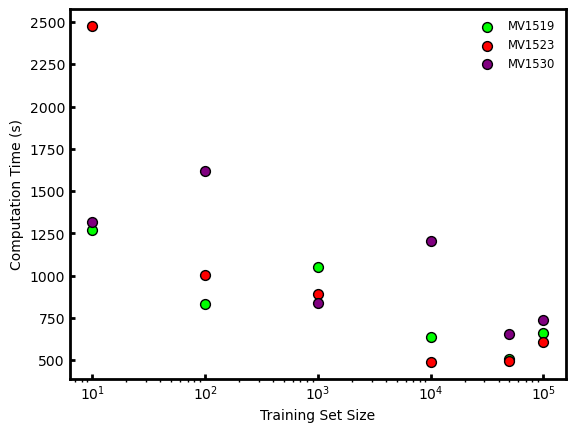

In [245]:
os.chdir(r'XXXX') ########## PLEASE PUT THE DIRECTORY WHERE YOU WOULD LIKE TO HAVE THE FIGURES STORED####################

training_data = [100000, 50000, 10000, 1000, 100, 10]
plt.scatter(training_data,Total_Time_MV1519, s=50, edgecolor='black', color='lime', label='MV1519')
plt.scatter(training_data,Total_Time_MV1523, s=50,edgecolor='black', color='red', label='MV1523')
plt.scatter(training_data,Total_Time_MV1530, s=50, edgecolor='black', color='purple', label='MV1530')
plt.xscale('log')


ax = plt.gca()

# Set the linewidth of the axis lines
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

plt.tick_params(axis='both', which='major', width=2)  # Adjust 'width' for thickness
plt.tick_params(axis='both', which='minor', width=1)  # Optionally adjust minor ticks

plt.legend(fontsize='small', frameon=False, loc='best')
#plt.title(str(key) + ': ANN_10')
plt.xlabel('Training Set Size')
plt.ylabel('Computation Time (s)')


# Get current axes
ax = plt.gca()

# Set the tick marks to point inside
ax.tick_params(axis='both', direction='in')
plt.savefig("ANN_LSR_Time.jpg", dpi=300, bbox_inches='tight' )

Now lets take the new LSR predictions and calculate the unweighted error.

The next cell re-loads stored data from the previous LSR analysis. This does not need to be used if the varaibles are already defined.

In [199]:
os.chdir(r'XXXX')  ########## PLEASE PUT THE DIRECTORY WHERE THE ANN + LSR DATA IS STORED IF YOU RUN THIS BLOCK ####################

# Start with MV1519 params
ANN3_10_MV1519_LSR_params = pd.read_csv('ANN3_10_MV1519_LSR_params.csv')
ANN3_100_MV1519_LSR_params = pd.read_csv('ANN3_100_MV1519_LSR_params.csv')
ANN3_1000_MV1519_LSR_params = pd.read_csv('ANN3_1000_MV1519_LSR_params.csv')
ANN3_10000_MV1519_LSR_params = pd.read_csv('ANN3_10000_MV1519_LSR_params.csv')
ANN3_50000_MV1519_LSR_params = pd.read_csv('ANN3_50000_MV1519_LSR_params.csv')
ANN3_100000_MV1519_LSR_params = pd.read_csv('ANN3_100000_MV1519_LSR_params.csv')

# MV1519 times

ANN3_10_MV1519_LSR_times = pd.read_csv( 'ANN3_10_MV1519_LSR_times.csv')
ANN3_100_MV1519_LSR_times = pd.read_csv( 'ANN3_100_MV1519_LSR_times.csv')
ANN3_1000_MV1519_LSR_times = pd.read_csv( 'ANN3_1000_MV1519_LSR_times.csv')
ANN3_10000_MV1519_LSR_times = pd.read_csv( 'ANN3_10000_MV1519_LSR_times.csv')
ANN3_50000_MV1519_LSR_times = pd.read_csv( 'ANN3_50000_MV1519_LSR_times.csv')
ANN3_100000_MV1519_LSR_times = pd.read_csv( 'ANN3_100000_MV1519_LSR_times.csv')

# MV1523 params

ANN3_10_MV1523_LSR_params = pd.read_csv('ANN3_10_MV1523_LSR_params.csv')
ANN3_100_MV1523_LSR_params = pd.read_csv('ANN3_100_MV1523_LSR_params.csv')
ANN3_1000_MV1523_LSR_params = pd.read_csv('ANN3_1000_MV1523_LSR_params.csv')
ANN3_10000_MV1523_LSR_params = pd.read_csv('ANN3_10000_MV1523_LSR_params.csv')
ANN3_50000_MV1523_LSR_params = pd.read_csv('ANN3_50000_MV1523_LSR_params.csv')
ANN3_100000_MV1523_LSR_params = pd.read_csv('ANN3_100000_MV1523_LSR_params.csv')

# MV1523 times

ANN3_10_MV1523_LSR_times = pd.read_csv( 'ANN3_10_MV1523_LSR_times.csv')
ANN3_100_MV1523_LSR_times = pd.read_csv( 'ANN3_100_MV1523_LSR_times.csv')
ANN3_1000_MV1523_LSR_times = pd.read_csv( 'ANN3_1000_MV1523_LSR_times.csv')
ANN3_10000_MV1523_LSR_times = pd.read_csv( 'ANN3_10000_MV1523_LSR_times.csv')
ANN3_50000_MV1523_LSR_times = pd.read_csv( 'ANN3_50000_MV1523_LSR_times.csv')
ANN3_100000_MV1523_LSR_times = pd.read_csv( 'ANN3_100000_MV1523_LSR_times.csv')


# MV1530 params

ANN4_10_MV1530_LSR_params = pd.read_csv('ANN4_10_MV1530_LSR_params.csv')
ANN4_100_MV1530_LSR_params = pd.read_csv('ANN4_100_MV1530_LSR_params.csv')
ANN4_1000_MV1530_LSR_params = pd.read_csv('ANN4_1000_MV1530_LSR_params.csv')
ANN4_10000_MV1530_LSR_params = pd.read_csv('ANN4_10000_MV1530_LSR_params.csv')
ANN4_50000_MV1530_LSR_params = pd.read_csv('ANN4_50000_MV1530_LSR_params.csv')
ANN4_100000_MV1530_LSR_params = pd.read_csv('ANN4_100000_MV1530_LSR_params.csv')

# MV1539 times

ANN4_10_MV1530_LSR_times = pd.read_csv( 'ANN4_10_MV1530_LSR_times.csv')
ANN4_100_MV1530_LSR_times = pd.read_csv( 'ANN4_100_MV1530_LSR_times.csv')
ANN4_1000_MV1530_LSR_times = pd.read_csv( 'ANN4_1000_MV1530_LSR_times.csv')
ANN4_10000_MV1530_LSR_times = pd.read_csv( 'ANN4_10000_MV1530_LSR_times.csv')
ANN4_50000_MV1530_LSR_times = pd.read_csv( 'ANN4_50000_MV1530_LSR_times.csv')
ANN4_100000_MV1530_LSR_times = pd.read_csv( 'ANN4_100000_MV1530_LSR_times.csv')

In [201]:
MV1519_list_LSR = [
    ANN3_10_MV1519_LSR_params, 
    ANN3_100_MV1519_LSR_params, 
    ANN3_1000_MV1519_LSR_params,
    ANN3_10000_MV1519_LSR_params, 
    ANN3_50000_MV1519_LSR_params, 
    ANN3_100000_MV1519_LSR_params,
]

ANN3_MV1519_LSR_NCS, ANN3_MV1519_LSR_CL = NCS_Genorator_ANN3(MV1519_list_LSR, 1.68, E, wv)

In [202]:
############ Generating error between ANN3 + LSR and experiment and LSR and experiment ################

path = r'XXXX'  ########## PLEASE PUT THE DIRECTORY WHERE YOU WOULD LIKE TO HAVE THESE PLOTS STORED ####################

# If you do not want to make plots, set "generate_images=False"
# If you do want to make plots, set "generate_images=True"

MV1519_Sigma_PostLSR, MV1519_LSR_Sigma_PostLSR = NCS_Comparison_ANN3(ANN3_MV1519_LSR_NCS, # simulated spectra from ANN + LSR
                                                                     MV1519[:, :, 1:], # excperimental data
                                                                     LSR_MV1519_NCS,  # traditional LSR data
                                                                     6, # number of fit parameters
                                                                     path, # path to save images
                                                                     generate_images=False, # makes images when true
                                                                     foldername = 'MV1519_PostLSR') # name for the folder created to contain images. 




Mod 1 Avg Sigma: 0.001835824677616501
LSQ Avg Sigma: 0.001830914187080713
Mod 2 Avg Sigma: 0.0018358178096333506
LSQ Avg Sigma: 0.001830914187080713
Mod 3 Avg Sigma: 0.0018359031621794728
LSQ Avg Sigma: 0.001830914187080713
Mod 4 Avg Sigma: 0.0018358402765318675
LSQ Avg Sigma: 0.001830914187080713
Mod 5 Avg Sigma: 0.0018359359127798772
LSQ Avg Sigma: 0.001830914187080713
Mod 6 Avg Sigma: 0.0018358487892181652
LSQ Avg Sigma: 0.001830914187080713


In [203]:
MV1523_list_LSR = [
    ANN3_10_MV1523_LSR_params, 
    ANN3_100_MV1523_LSR_params, 
    ANN3_1000_MV1523_LSR_params,
    ANN3_10000_MV1523_LSR_params, 
    ANN3_50000_MV1523_LSR_params, 
    ANN3_50000_MV1523_LSR_params,
]

ANN3_MV1523_LSR_NCS, ANN3_MV1523_LSR_CL = NCS_Genorator_ANN3(MV1523_list_LSR, 1.65, E, wv)

In [204]:
############ Generating error between ANN3 + LSR and experiment and LSR and experiment ################

path = r'XXXX'  ########## PLEASE PUT THE DIRECTORY WHERE YOU WOULD LIKE TO HAVE THESE PLOTS STORED ####################

# If you do not want to make plots, set "generate_images=False"
# If you do want to make plots, set "generate_images=True"

MV1523_Sigma_PostLSR, MV1523_LSR_Sigma_PostLSR = NCS_Comparison_ANN3(ANN3_MV1523_LSR_NCS, # simulated spectra from ANN + LSR
                                                                     MV1523[:, :, 1:], # excperimental data
                                                                     LSR_MV1523_NCS,  # traditional LSR data
                                                                     6, # number of fit parameters
                                                                     path, # path to save images
                                                                     generate_images=False, # makes images when true
                                                                     foldername = 'MV1523_PostLSR') # name for the folder created to contain images. 




Mod 1 Avg Sigma: 0.024016254333716562
LSQ Avg Sigma: 0.002686991044683442
Mod 2 Avg Sigma: 0.0026869942907928692
LSQ Avg Sigma: 0.002686991044683442
Mod 3 Avg Sigma: 0.0026869950586693946
LSQ Avg Sigma: 0.002686991044683442
Mod 4 Avg Sigma: 0.0026869950213255283
LSQ Avg Sigma: 0.002686991044683442
Mod 5 Avg Sigma: 0.0026869926154897477
LSQ Avg Sigma: 0.002686991044683442
Mod 6 Avg Sigma: 0.0026869926154897477
LSQ Avg Sigma: 0.002686991044683442


In [205]:
MV1530_list_LSR = [
    ANN4_10_MV1530_LSR_params, 
    ANN4_100_MV1530_LSR_params, 
    ANN4_1000_MV1530_LSR_params,
    ANN4_10000_MV1530_LSR_params, 
    ANN4_50000_MV1530_LSR_params, 
    ANN4_50000_MV1530_LSR_params,
]

ANN4_MV1530_LSR_NCS, ANN4_MV1530_LSR_CL =  NCS_Genorator_ANN4(MV1530_list_LSR, E, wv)

In [206]:
############ Generating error between ANN4 + LSR and experiment and LSR and experiment ################

path = r'XXXX'  ########## PLEASE PUT THE DIRECTORY WHERE YOU WOULD LIKE TO HAVE THESE PLOTS STORED ####################

# If you do not want to make plots, set "generate_images=False"
# If you do want to make plots, set "generate_images=True"

MV1530_Sigma_PostLSR, MV1530_LSR_Sigma_PostLSR = NCS_Comparison_ANN4_v2(ANN4_MV1530_LSR_NCS,  # simulated spectra from ANN + LSR
                                                                        MV1530[:, :, 1:], # excperimental data
                                                                        LSR_MV1530_NCS, # traditional LSR data
                                                                        7, # number of fit parameters
                                                                        path, # path to save images
                                                                        generate_images=False, # makes images when true
                                                                        foldername = 'MV1530_PostLSR' # name for the folder created to contain images. 
                                                                       )

Mod 1 Avg Sigma: 0.0023073359875980426
LSQ Avg Sigma: 0.0023073313430062637
Mod 2 Avg Sigma: 0.002307338412098726
LSQ Avg Sigma: 0.0023073313430062637
Mod 3 Avg Sigma: 0.0023073461505653567
LSQ Avg Sigma: 0.0023073313430062637
Mod 4 Avg Sigma: 0.0023079489741472618
LSQ Avg Sigma: 0.0023073313430062637
Mod 5 Avg Sigma: 0.0023073586064832376
LSQ Avg Sigma: 0.0023073313430062637
Mod 6 Avg Sigma: 0.0023073586064832376
LSQ Avg Sigma: 0.0023073313430062637


In [213]:
data1 = MV1519_Sigma_PostLSR
data1.append(MV1519_LSR_Sigma[0])

data2 = MV1523_Sigma_PostLSR
data2.append(MV1523_LSR_Sigma[0])

data3 = MV1530_Sigma_PostLSR
data3.append(MV1530_LSR_Sigma[0])

The following code displays the sigma values for each data point after the ANN predictions are fed into the least-square regression process

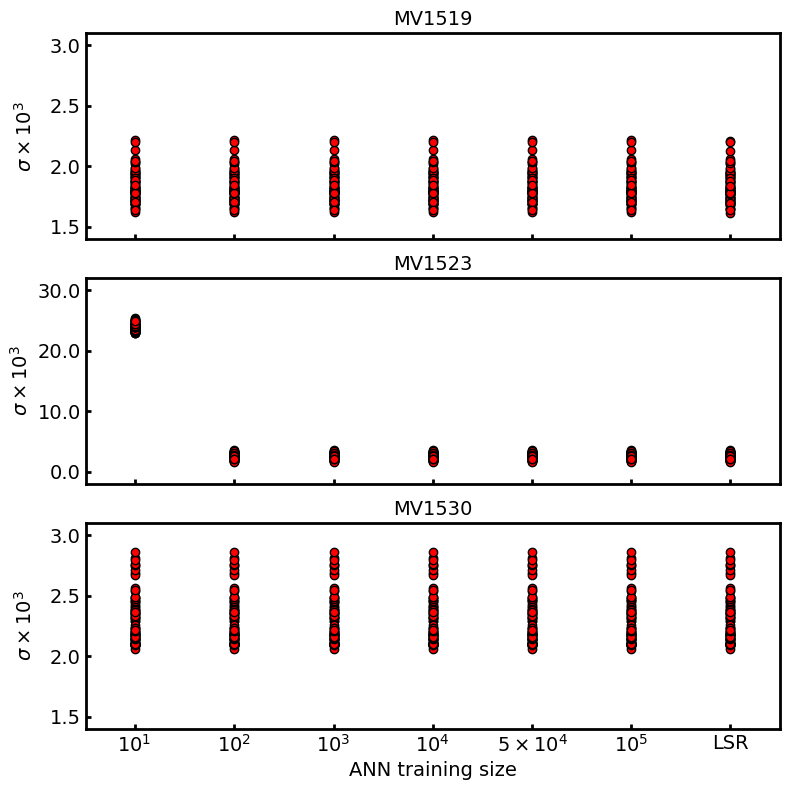

In [242]:
os.chdir(r'XXXX')  ########## PLEASE PUT THE DIRECTORY WHERE YOU WOULD LIKE TO HAVE THESE PLOTS STORED ####################

font_properties = {'fontsize': 14, 'fontweight': 'normal', 'family': 'sans-serif'}

# Create a figure and axes for the subplots
fig, axs = plt.subplots(3, 1, figsize=(8, 8))

tick_labels = ['$10^{1}$ ', '$10^{2}$', '$10^{3}$' , '$10^{4}$', r'$5 \times 10^{4}$', '$10^{5}$', 'LSR']

# Create box plots for the first dataset
boxplot1 = axs[0].boxplot(data1,       
            vert=True, 
            patch_artist=True, 
            flierprops=dict(marker='', color='red', alpha=0.5),
            boxprops=dict(linewidth=3),
            whiskerprops=dict(linewidth=3), 
            medianprops=dict(color='black', linewidth=3))  # Vertical box plots
axs[0].set_title('MV1519', fontsize=14)
axs[0].set_ylabel(r'$σ \times 10^{3}$', fontsize=14, labelpad=10)
axs[0].set_ylim(0.0014, 0.0031)
axs[0].set_yticks( np.linspace(0.0015, 0.003, 4)  )
axs[0].set_xticklabels([])
axs[0].tick_params(axis='both', which='major', labelsize=14)  # Adjust labelsize as needed
#custom_ticks = np.linspace(0.05, 0.03, 6) 
#axs[0].set_ylim(-0.005, 0.03)
#axs[0].set_yticks(custom_ticks)


# Create box plots for the second dataset
boxplot2 = axs[1].boxplot(data2,        
            vert=True, 
            patch_artist=True, 
            flierprops=dict(marker='', color='red', alpha=0.5),
            boxprops=dict(linewidth=3),
            whiskerprops=dict(linewidth=3), 
            medianprops=dict(color='black', linewidth=3))
axs[1].set_title('MV1523', fontsize=14)
axs[1].set_ylim(-0.002, 0.032)
axs[1].set_yticks(np.arange(0.00, 0.031, 0.01))
axs[1].set_ylabel(r'$σ \times 10^{3}$', fontsize=14)
axs[1].set_xticklabels([])
axs[1].tick_params(axis='both', which='major', labelsize=14)  # Adjust labelsize as needed
#axs[1].set_ylim(-3, 4)

# Create box plots for the third dataset
boxplot3 = axs[2].boxplot(data3,    
            vert=True, 
            patch_artist=True, 
            flierprops=dict(marker='', color='red', alpha=0.5),
            boxprops=dict(linewidth=3),
            whiskerprops=dict(linewidth=3), 
            medianprops=dict(color='black', linewidth=3))
axs[2].set_title('MV1530', fontsize=14)
axs[2].set_ylabel(r'$σ \times 10^{3}$', fontsize=14, labelpad=10)
axs[2].set_xticklabels(tick_labels, fontdict=font_properties)
axs[2].tick_params(axis='both', which='major', labelsize=14)  # Adjust labelsize as needed
custom_ticks = np.linspace(0.0015, 0.003, 4) 
axs[2].set_xlabel('ANN training size', fontsize=14)
axs[2].set_yticks(custom_ticks)
axs[2].set_ylim(0.0014, 0.0031)

# Hide the box and whisker lines
for box in boxplot1['boxes']:
    box.set_visible(False)  # Hide the box

for whisker in boxplot1['whiskers']:
    whisker.set_visible(False)  # Hide the whiskers

# Optional: You can still display the median and fliers
for median in boxplot1['medians']:
    median.set_visible(False)  # Keep the median line visible

for flier in boxplot1['fliers']:
    flier.set_visible(False)  # Keep the outliers visible

for cap in boxplot1['caps']:
    cap.set_visible(False)  # Hide the caps

# Hide the box and whisker lines
for box in boxplot2['boxes']:
    box.set_visible(False)  # Hide the box

for whisker in boxplot2['whiskers']:
    whisker.set_visible(False)  # Hide the whiskers

# Optional: You can still display the median and fliers
for median in boxplot2['medians']:
    median.set_visible(False)  # Keep the median line visible

for flier in boxplot2['fliers']:
    flier.set_visible(False)  # Keep the outliers visible

for cap in boxplot2['caps']:
    cap.set_visible(False)  # Hide the caps


# Hide the box and whisker lines
for box in boxplot3['boxes']:
    box.set_visible(False)  # Hide the box

for whisker in boxplot3['whiskers']:
    whisker.set_visible(False)  # Hide the whiskers

# Optional: You can still display the median and fliers
for median in boxplot3['medians']:
    median.set_visible(False)  # Keep the median line visible

for flier in boxplot3['fliers']:
    flier.set_visible(False)  # Keep the outliers visible

for cap in boxplot3['caps']:
    cap.set_visible(False)  # Hide the caps


for ax in axs:
    ax.spines['top'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)

    # Make ticks point inward
    ax.tick_params(direction='in', width=2)



for i in range(len(data1)):
    axs[0].scatter([i + 1] * len(data1[i]), data1[i], color='red', marker='o', edgecolor = 'black')
    axs[1].scatter([i + 1] * len(data2[i]), data2[i], color='red', marker='o', edgecolor = 'black')
    axs[2].scatter([i + 1] * len(data3[i]), data3[i], color='red', marker='o', edgecolor = 'black')


#for i, label in enumerate(plt.gca().get_xticklabels()):
    #if label.get_text() == 'LSR':
        #label.set_y(label.get_position()[1] - 0.01)  # Move Group A up



def format_ticks(x, _):
    return f'{x * 1000:.1f}'  # Multiply by scale_factor

for ax in axs:
    ax.yaxis.set_major_formatter(FuncFormatter(format_ticks))


# Adjust layout
plt.tight_layout()

# Show the plot
plt.savefig("ANN_Condensed_Post_LSR" + str(i) + ".jpg",  dpi=300, bbox_inches='tight' )
plt.show()



In [220]:
os.chdir(r'XXXX') ########## PLEASE PUT THE DIRECTORY WHERE YOU WOULD LIKE TO HAVE THESE PLOTS STORED ####################

df1 = pd.DataFrame(MV1519_params) # store parameter values from traditional LSR
df2 = pd.DataFrame(MV1523_params) # store parameter values from traditional LSR
df3 = pd.DataFrame(MV1530_params) # store parameter values from traditional LSR

############### Ep Plot ################################################
key = 'Ep'

x = pd.concat( [df1[str(key)], df2[str(key)], df3[str(key)] ], ignore_index=True) # concatenate ground truth values

x_line = np.linspace(min(x) -0.4 ,max(x) + 0.4 , 20)


plt.xlim (min(x_line) + 0.1 , max(x_line) -0.1) # set limits on x in graph
plt.ylim(min(x_line)+ 0.1, max(x_line)- 0.1 ) # set limits on Y in graph


plt.plot(x_line, x_line, color='Black', linewidth= 2 )
plt.plot(x_line, Ep_intercept_lower + x_line, color='Black', linestyle='--', linewidth= 2)
plt.plot(x_line, Ep_intercept_upper + x_line, color='Black', linestyle='--',  linewidth= 2)


#plt.scatter(MV1519_params[str(key)], ANN3_50000_MV1519[str(key)], s=15, color='lime', label='MV1519 ANN' )
#plt.scatter(MV1523_params[str(key)], ANN3_50000_MV1523[str(key)],  s=15, color='red', label='MV1523 ANN' )
#plt.scatter(MV1530_params[str(key)], ANN4_50000_MV1530[str(key)], s=15, color='Purple', label='MV1530 ANN')


plt.scatter(MV1519_params[str(key)], ANN3_50000_MV1519_LSR_params[str(key)], s=15, color='green', label='MV1519' )
plt.scatter(MV1523_params[str(key)], ANN3_50000_MV1523_LSR_params[str(key)],  s=15, color='darkred', label='MV1523' )
plt.scatter(MV1530_params[str(key)], ANN4_50000_MV1530_LSR_params[str(key)], s=15, color='violet', label='MV1530')


plt.legend(fontsize='small', frameon=False, loc='best')
#plt.title(str(key) + ': ANN_50000')
plt.xlabel('Traditional LSR $E_{p}$ (eV)')
plt.ylabel('ANN LSR $E_{p} (eV)$')

# Plot configurations


ax = plt.gca()

# Set the linewidth of the axis lines
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

plt.tick_params(axis='both', which='major', width=2)  # Adjust 'width' for thickness
plt.tick_params(axis='both', which='minor', width=1)  # Optionally adjust minor ticks

# Get current axes
ax = plt.gca()

# Set the tick marks to point inside
ax.tick_params(axis='both', direction='in')

x_ticks = plt.xticks()[0]  # Get current x-ticks
plt.xticks(x_ticks[2:8])
y_ticks = plt.yticks()[0]  # Get current x-ticks
plt.yticks(x_ticks[2:8])



plt.savefig("ANN_50000_LSR " + str(key) + ".jpg", dpi=300, bbox_inches='tight' )  # Saves the plot as a PDF file
plt.close()


############### Ep Plot End ################################################



df1 = pd.DataFrame(MV1519_params) # Store Si_ANN test predictions
df2 = pd.DataFrame(MV1523_params) # Store SLG_ANN test predictions
df3 = pd.DataFrame(MV1530_params) # Store SLG_ANN test predictions


############### Eg Plot ################################################
key = 'Eg'

x = pd.concat( [df1[str(key)], df2[str(key)], df3[str(key)] ], ignore_index=True) # concatenate ground truth values

x_line = np.linspace(min(x),max(x), 20)

x_line = np.linspace(min(x) -0.4 ,max(x) + 0.4 , 20)

plt.xlim (min(x_line) + 0.1 , max(x_line) -0.1) # set limits on x in graph
plt.ylim(min(x_line)+ 0.1, max(x_line)- 0.1 ) # set limits on Y in graph


plt.plot(x_line, x_line, color='Black', linewidth= 2 )
plt.plot(x_line, Eg_intercept_lower + x_line, color='Black', linestyle='--', linewidth= 2)
plt.plot(x_line, Eg_intercept_upper + x_line, color='Black', linestyle='--',  linewidth= 2)


plt.scatter(MV1519_params[str(key)], ANN3_50000_MV1519_LSR_params[str(key)], s=15, color='lime', label='MV1519' )
plt.scatter(MV1523_params[str(key)], ANN3_50000_MV1523_LSR_params[str(key)],  s=15, color='red', label='MV1523' )
plt.scatter(MV1530_params[str(key)], ANN4_50000_MV1530_LSR_params[str(key)], s=15, color='purple', label='MV1530')


plt.legend(fontsize='small', frameon=False, loc='best')
#plt.title(str(key) + ': ANN_50000')
plt.xlabel('Traditional LSR $E_{g}$ (eV)')
plt.ylabel('ANN LSR $E_{g} (eV)$')

# Plot configurations


ax = plt.gca()

# Set the linewidth of the axis lines
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

plt.tick_params(axis='both', which='major', width=2)  # Adjust 'width' for thickness
plt.tick_params(axis='both', which='minor', width=1)  # Optionally adjust minor ticks

# Get current axes
ax = plt.gca()

# Set the tick marks to point inside
ax.tick_params(axis='both', direction='in')

x_ticks = plt.xticks()[0]  # Get current x-ticks
plt.xticks(x_ticks[1:8])
y_ticks = plt.yticks()[0]  # Get current x-ticks
plt.yticks(x_ticks[1:8])



plt.savefig("ANN_50000_LSR " + str(key) + ".jpg", dpi=300, bbox_inches='tight' )  # Saves the plot as a PDF file
plt.close()


############### Eg Plot End ################################################


df1 = pd.DataFrame(MV1519_params) # Store Si_ANN test predictions
df2 = pd.DataFrame(MV1523_params) # Store SLG_ANN test predictions
df3 = pd.DataFrame(MV1530_params) # Store SLG_ANN test predictions


############### Eo Plot ################################################
key = 'Eo'

x = pd.concat( [df1[str(key)], df2[str(key)], df3[str(key)] ], ignore_index=True) # concatenate ground truth values


x_line = np.linspace(min(x) -0.4 ,max(x) + 0.4 , 20)

plt.xlim (min(x_line) + 0.1 , max(x_line) -0.1) # set limits on x in graph
plt.ylim(min(x_line)+ 0.1, max(x_line)- 0.1 ) # set limits on Y in graph


plt.plot(x_line, x_line, color='Black', linewidth= 2 )
plt.plot(x_line, Eo_intercept_lower + x_line, color='Black', linestyle='--', linewidth= 2)
plt.plot(x_line, Eo_intercept_upper + x_line, color='Black', linestyle='--',  linewidth= 2)


plt.scatter(MV1519_params[str(key)], ANN3_50000_MV1519_LSR_params[str(key)], s=15, color='lime', label='MV1519' )
plt.scatter(MV1523_params[str(key)], ANN3_50000_MV1523_LSR_params[str(key)],  s=15, color='red', label='MV1523' )
plt.scatter(MV1530_params[str(key)], ANN4_50000_MV1530_LSR_params[str(key)], s=15, color='purple', label='MV1530')


plt.legend(fontsize='small', frameon=False, loc='best')
#plt.title(str(key) + ': ANN_50000')
plt.xlabel('Traditional LSR $E_{0}$ (eV)')
plt.ylabel('ANN LSR $E_{0} (eV)$')

# Plot configurations


ax = plt.gca()

# Set the linewidth of the axis lines
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

plt.tick_params(axis='both', which='major', width=2)  # Adjust 'width' for thickness
plt.tick_params(axis='both', which='minor', width=1)  # Optionally adjust minor ticks

# Get current axes
ax = plt.gca()

# Set the tick marks to point inside
ax.tick_params(axis='both', direction='in')

x_ticks = plt.xticks()[0]  # Get current x-ticks
plt.xticks(x_ticks[1:8])
y_ticks = plt.yticks()[0]  # Get current x-ticks
plt.yticks(x_ticks[1:8])



plt.savefig("ANN_50000_LSR " + str(key) + ".jpg", dpi=300, bbox_inches='tight' )  # Saves the plot as a PDF file
plt.close()


############### Eo Plot End ################################################


df1 = pd.DataFrame(MV1519_params) # Store Si_ANN test predictions
df2 = pd.DataFrame(MV1523_params) # Store SLG_ANN test predictions
df3 = pd.DataFrame(MV1530_params) # Store SLG_ANN test predictions


############### BulkT Plot ################################################
key = 'BulkT'

x = pd.concat( [df1[str(key)], df2[str(key)], df3[str(key)] ], ignore_index=True) # concatenate ground truth values


x_line = np.linspace(min(x) -5  ,max(x) + 5 , 20)

plt.xlim (min(x_line) + 1 , max(x_line) -1) # set limits on x in graph
plt.ylim(min(x_line)+ 1, max(x_line)- 1 ) # set limits on Y in graph



plt.plot(x_line, x_line, color='Black', linewidth= 2 )
plt.plot(x_line, Bulkt_intercept_lower + x_line, color='Black', linestyle='--', linewidth= 2)
plt.plot(x_line, Bulkt_intercept_upper + x_line, color='Black', linestyle='--',  linewidth= 2)


plt.scatter(MV1519_params[str(key)], ANN3_50000_MV1519_LSR_params[str(key)], s=15, color='lime', label='MV1519' )
plt.scatter(MV1523_params[str(key)], ANN3_50000_MV1523_LSR_params[str(key)],  s=15, color='red', label='MV1523' )
plt.scatter(MV1530_params[str(key)], ANN4_50000_MV1530_LSR_params[str(key)], s=15, color='purple', label='MV1530')


plt.legend(fontsize='small', frameon=False, loc='best')
#plt.title(str(key) + ': ANN_50000')
plt.xlabel('Traditional LSR Bulk Thickness (nm)')
plt.ylabel('ANN LSR Bulk Thickness (nm)')

# Plot configurations


ax = plt.gca()

# Set the linewidth of the axis lines
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

plt.tick_params(axis='both', which='major', width=2)  # Adjust 'width' for thickness
plt.tick_params(axis='both', which='minor', width=1)  # Optionally adjust minor ticks

# Get current axes
ax = plt.gca()

# Set the tick marks to point inside
ax.tick_params(axis='both', direction='in')

x_ticks = plt.xticks()[0]  # Get current x-ticks
plt.xticks(x_ticks[1:8])
y_ticks = plt.yticks()[0]  # Get current x-ticks
plt.yticks(x_ticks[1:8])



plt.savefig("ANN_50000_LSR " + str(key) + ".jpg", dpi=300, bbox_inches='tight' )  # Saves the plot as a PDF file
plt.close()


############### BulkT Plot End ################################################



df1 = pd.DataFrame(MV1519_params) # Store Si_ANN test predictions
df2 = pd.DataFrame(MV1523_params) # Store SLG_ANN test predictions
df3 = pd.DataFrame(MV1530_params) # Store SLG_ANN test predictions


############### Br Plot ################################################
key = 'Br'

x = pd.concat( [df1[str(key)], df2[str(key)], df3[str(key)] ], ignore_index=True) # concatenate ground truth values

x_line = np.linspace(min(x) -0.4 ,max(x) + 0.4 , 20)

plt.xlim (min(x_line) + 0.1 , max(x_line) -0.1) # set limits on x in graph
plt.ylim(min(x_line)+ 0.1, max(x_line)- 0.1 ) # set limits on Y in graph


plt.plot(x_line, x_line, color='Black', linewidth= 2 )
plt.plot(x_line,  Br_intercept_lower + x_line, color='Black', linestyle='--', linewidth= 2)
plt.plot(x_line, Br_intercept_upper + x_line, color='Black', linestyle='--',  linewidth= 2)


plt.scatter(MV1519_params[str(key)], ANN3_50000_MV1519_LSR_params[str(key)], s=15, color='lime', label='MV1519' )
plt.scatter(MV1523_params[str(key)], ANN3_50000_MV1523_LSR_params[str(key)],  s=15, color='red', label='MV1523' )
plt.scatter(MV1530_params[str(key)], ANN4_50000_MV1530_LSR_params[str(key)], s=15, color='purple', label='MV1530')


plt.legend(fontsize='small', frameon=False, loc='best')
#plt.title(str(key) + ': ANN_50000')
plt.xlabel('Traditional LSR ' + r'$/Gamma$ (eV)')
plt.ylabel('ANN LSR ' + r'$/Gamma$ (eV)')

# Plot configurations


ax = plt.gca()

# Set the linewidth of the axis lines
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

plt.tick_params(axis='both', which='major', width=2)  # Adjust 'width' for thickness
plt.tick_params(axis='both', which='minor', width=1)  # Optionally adjust minor ticks

# Get current axes
ax = plt.gca()

# Set the tick marks to point inside
ax.tick_params(axis='both', direction='in')

x_ticks = plt.xticks()[0]  # Get current x-ticks
plt.xticks(x_ticks[1:8])
y_ticks = plt.yticks()[0]  # Get current x-ticks
plt.yticks(x_ticks[1:8])



plt.savefig("ANN_50000_LSR " + str(key) + ".jpg", dpi=300, bbox_inches='tight' )  # Saves the plot as a PDF file
plt.close()


############### Br Plot End ################################################



df1 = pd.DataFrame(MV1519_params) # Store Si_ANN test predictions
df2 = pd.DataFrame(MV1523_params) # Store SLG_ANN test predictions
df3 = pd.DataFrame(MV1530_params) # Store SLG_ANN test predictions


############### Amp Plot ################################################
key = 'Amp'

x = pd.concat( [df1[str(key)], df2[str(key)], df3[str(key)] ], ignore_index=True) # concatenate ground truth values


x_line = np.linspace(min(x) -15  ,max(x) + 15 , 20)

plt.xlim (min(x_line) + 2 , max(x_line) -2) # set limits on x in graph
plt.ylim(min(x_line)+ 2, max(x_line)- 2 ) # set limits on Y in graph



plt.plot(x_line, x_line, color='Black', linewidth= 2 )
plt.plot(x_line, Amp_intercept_lower + x_line, color='Black', linestyle='--', linewidth= 2)
plt.plot(x_line, Amp_intercept_upper + x_line, color='Black', linestyle='--',  linewidth= 2)


plt.scatter(MV1519_params[str(key)], ANN3_50000_MV1519_LSR_params[str(key)], s=15, color='lime', label='MV1519' )
plt.scatter(MV1523_params[str(key)], ANN3_50000_MV1523_LSR_params[str(key)],  s=15, color='red', label='MV1523' )
plt.scatter(MV1530_params[str(key)], ANN4_50000_MV1530_LSR_params[str(key)], s=15, color='purple', label='MV1530')


plt.legend(fontsize='small', frameon=False, loc='best')
#plt.title(str(key) + ': ANN_50000')
plt.xlabel('Traditional LSR $A$ (eV)')
plt.ylabel('ANN LSR $A$ (eV)')

# Plot configurations


ax = plt.gca()

# Set the linewidth of the axis lines
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

plt.tick_params(axis='both', which='major', width=2)  # Adjust 'width' for thickness
plt.tick_params(axis='both', which='minor', width=1)  # Optionally adjust minor ticks

# Get current axes
ax = plt.gca()

# Set the tick marks to point inside
ax.tick_params(axis='both', direction='in')

x_ticks = plt.xticks()[0]  # Get current x-ticks
plt.xticks(x_ticks[1:7])
y_ticks = plt.yticks()[0]  # Get current x-ticks
plt.yticks(x_ticks[1:7])



plt.savefig("ANN_50000_LSR " + str(key) + ".jpg", dpi=300, bbox_inches='tight' )  # Saves the plot as a PDF file
plt.close()


############### Amp Plot End ################################################


df1 = pd.DataFrame(MV1519_params) # Store Si_ANN test predictions
df2 = pd.DataFrame(MV1523_params) # Store SLG_ANN test predictions
df3 = pd.DataFrame(MV1530_params) # Store SLG_ANN test predictions


############### Amp Plot ################################################
key = 'EMAT'

x = pd.concat(  [df3[str(key)] ], ignore_index=True) # concatenate ground truth values

x_line = np.linspace(min(x) -0.3 ,max(x) + 0.3 , 20)


plt.xlim (min(x_line) + 0.1 , max(x_line) -0.1) # set limits on x in graph
plt.ylim(min(x_line)+ 0.1, max(x_line)- 0.1 ) # set limits on Y in graph



plt.plot(x_line, x_line, color='Black', linewidth= 2 )
plt.plot(x_line, EMAT_intercept_lower + x_line, color='Black', linestyle='--', linewidth= 2)
plt.plot(x_line, EMAT_intercept_upper +x_line, color='Black', linestyle='--',  linewidth= 2)


#plt.scatter(MV1519_params[str(key)], ANN3_50000_MV1519_LSR[str(key)], s=15, color='lime', label='MV1519' )
#plt.scatter(MV1523_params[str(key)], ANN3_50000_MV1523_LSR[str(key)],  s=15, color='red', label='MV1523' )
plt.scatter(MV1530_params[str(key)], ANN4_50000_MV1530_LSR_params[str(key)], s=15, color='purple', label='MV1530')


plt.legend(fontsize='small', frameon=False, loc='best')
#plt.title(str(key) + ': ANN_50000')
plt.xlabel('Traditional LSR Surface Layer Thickness (nm)')
plt.ylabel('ANN LSR Surface Layer Thickness (nm)')

# Plot configurations


ax = plt.gca()

# Set the linewidth of the axis lines
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

plt.tick_params(axis='both', which='major', width=2)  # Adjust 'width' for thickness
plt.tick_params(axis='both', which='minor', width=1)  # Optionally adjust minor ticks

# Get current axes
ax = plt.gca()

# Set the tick marks to point inside
ax.tick_params(axis='both', direction='in')

x_ticks = plt.xticks()[0]  # Get current x-ticks
plt.xticks(x_ticks[1:6])
y_ticks = plt.yticks()[0]  # Get current x-ticks
plt.yticks(x_ticks[1:6])



plt.savefig("ANN_50000_LSR " + str(key) + ".jpg", dpi=300, bbox_inches='tight' )  # Saves the plot as a PDF file
plt.close()


############### Amp Plot End ################################################


